<a href="https://colab.research.google.com/github/aquinojoeanson/Capstone_Project_3/blob/main/2_Revisived_Machine_Learning__NLP_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py
import pickle
import matplotlib
import matplotlib.colors
%matplotlib inline
#
# data manipulation and math
#
import numpy as np
import scipy as sp
import pandas as pd
#
# plotting and visualization
#
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
import seaborn as sns
#
# modeling
#
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#
print("Loaded Libraries")

import os

# For Data Preprocessing
from sklearn.model_selection import train_test_split

# For Model Building
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# For Model Evaluation
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_roc_curve, auc
#from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

Loaded Libraries


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
#
plt.rcParams['figure.figsize'] = (5, 5)
plt.style.use('seaborn-pastel')
plt.rcParams['figure.dpi'] = 150
#
c0 = sns.color_palette()[0]
c1 = sns.color_palette()[1]
c2 = sns.color_palette()[2]
c1 = sns.color_palette()[3]
c2 = sns.color_palette()[4]
#
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#

In [ ]:
def points_plot(ax, Xtr, Xte, ytr, yte,
                clf,
                mesh = True, colorscale = cmap_light, cdiscrete = cmap_bold,
                alpha = 0.1, psize = 10,
                zfunc = False, predicted = False):
#
# note: this function only works for X.shape = (:, 2)
# it is intended to illustrate the classifier boundary
#
# get the column names if they exist to apply
# to the meshed data generated below
#
    try:
        feature_names = Xtr.columns
    except:
        feature_names = None
#
    Xtrain = np.array(Xtr)
    Xtest = np.array(Xte)
#
    h = 0.02
#
# create a uniform grid spanning the range of the X values
# note that y here is NOT the target, it is the 2nd
# dimension of the desired plot
#
    X = np.concatenate((Xtrain, Xtest))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
#
# predict the target value at each point in the grid
#
# this method uses the probabilities from the classifier
# and applies a function to determine the class
#
    if zfunc:
        mesh_data = np.c_[xx.ravel(), yy.ravel()]
        if feature_names is not None:
            mesh_data = pd.DataFrame(mesh_data,
                         columns = feature_names)
        p0 = clf.predict_proba(mesh_data)[:, 0]
        p1 = clf.predict_proba(mesh_data)[:, 1]
        Z = zfunc(p0, p1)
#
# this method uses the classifier to predict the classes directly
#
    else:
        mesh_data = np.c_[xx.ravel(), yy.ravel()]
        if feature_names is not None:
            mesh_data = pd.DataFrame(mesh_data,
                                     columns = feature_names)
        Z = clf.predict(mesh_data)
    ZZ = Z.reshape(xx.shape)
#
# plt.pcolormesh() creates a shaded result over the grid
#
    if mesh:
        plt.pcolormesh(xx, yy, ZZ,
                       cmap = cmap_light,
                       alpha = alpha,
                       axes = ax,
                       shading = 'auto')
#
# add the points to the plot
# these can be the original target values
# or the predicted values
#
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
#
# plot training points
#
    ax.scatter(Xtrain[:, 0], Xtrain[:, 1],
               c = showtr - 1,
               cmap = cmap_bold,
               s = psize,
               alpha = alpha,
               edgecolor = "k")
#
# plot testing points
#
    ax.scatter(Xtest[:, 0], Xtest[:, 1],
               c = showte - 1,
               cmap = cmap_bold,
               s = psize + 10,
               alpha = alpha,
               marker = "s")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#
    return ax, xx, yy
def points_plot_prob(ax, Xtr, Xte, ytr, yte,
                     clf, colorscale = cmap_light, cdiscrete = cmap_bold,
                     ccolor = cm,
                     alpha = 0.1, psize = 10):
    try:
        feature_names = Xtr.columns
    except:
        feature_names = None
#
    Xtrain = np.array(Xtr)
    Xtest = np.array(Xte)
#
    ax, xx, yy = points_plot(ax, Xtr, Xte, ytr, yte,
                         clf,
                         mesh = False,
                         colorscale = colorscale, cdiscrete = cdiscrete,
                         psize = psize, alpha = alpha,
                         predicted = True)
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    if feature_names is not None:
        mesh_data = pd.DataFrame(mesh_data,
                     columns = feature_names)
    Z = clf.predict_proba(mesh_data)[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = ccolor, alpha = 0.2)
    cs2 = plt.contour(xx, yy, Z, cmap = ccolor, alpha = 0.6)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 12)
#
    plt.show()

# Loading the data

In [ ]:
dataset = "reviews_Electronics_5.json"

if os.path.isfile(dataset):
   df = pd.read_json("reviews_Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

model_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/modelWV_df.csv")
model_df["label"] = df["overall"]

In [ ]:
model_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,label
0,-0.042715,0.449554,-0.058469,-0.210948,0.221794,-0.406341,0.152388,0.559175,-0.487808,-0.415364,-0.309774,-0.355006,-0.060860,-0.071051,-0.072163,-0.282156,0.037355,-0.639570,-0.387473,-0.854952,0.251314,0.505311,-0.015574,-0.076046,-0.414781,0.030819,-0.349444,-0.302543,-0.689056,0.063623,0.373364,0.107704,0.148006,-0.201687,-0.394011,0.401003,0.059867,-0.292104,-0.438942,-0.547155,-0.166941,-0.437101,-0.123190,-0.114292,0.612041,-0.576820,-0.702739,0.143140,0.153744,0.082227,0.280480,-0.238810,-0.008685,-0.216056,-0.469322,0.184101,0.042346,-0.015220,-0.549942,0.036914,0.286648,-0.132839,-0.152812,-0.074319,-0.710948,0.682524,0.099311,0.331776,-0.862278,0.681688,-0.295682,0.315098,0.278984,0.008110,0.036942,0.450192,0.075679,-0.005922,-0.671944,0.048133,-0.309903,0.006147,-0.338174,0.706667,-0.268863,0.211122,-0.000872,0.652745,0.566044,0.051018,0.763038,0.166407,-0.031325,-0.102957,0.845048,0.180261,0.347787,-0.633866,0.123177,0.221894,5
1,-0.058009,0.447886,-0.060280,-0.213946,0.239694,-0.400263,0.140340,0.551776,-0.484460,-0.416487,-0.322385,-0.357648,-0.065022,-0.071069,-0.066520,-0.268836,0.042529,-0.635724,-0.382373,-0.840551,0.241458,0.491586,-0.016825,-0.087140,-0.411187,0.043008,-0.358012,-0.301234,-0.682514,0.079982,0.392940,0.100999,0.126498,-0.200839,-0.380212,0.404495,0.056747,-0.277910,-0.430129,-0.532116,-0.149157,-0.451811,-0.122679,-0.112458,0.612470,-0.570966,-0.688601,0.133310,0.147548,0.070951,0.300061,-0.250799,-0.005964,-0.215567,-0.485245,0.197829,0.047067,0.005360,-0.546543,0.025054,0.276695,-0.130041,-0.153264,-0.069373,-0.705983,0.681712,0.108221,0.319236,-0.847437,0.689173,-0.307040,0.295259,0.285015,0.024083,0.027162,0.439603,0.053310,-0.005665,-0.660069,0.055535,-0.318107,0.005433,-0.339739,0.687915,-0.258279,0.204640,-0.005947,0.646505,0.564813,0.033105,0.758032,0.165706,-0.031013,-0.115166,0.828764,0.180414,0.361801,-0.627044,0.112354,0.219076,1
2,-0.042507,0.462787,-0.075884,-0.228007,0.244245,-0.383637,0.138473,0.547498,-0.502998,-0.400627,-0.338452,-0.356055,-0.046745,-0.082042,-0.062373,-0.293004,0.040697,-0.641002,-0.398294,-0.861069,0.231807,0.502349,-0.034264,-0.082298,-0.427909,0.033535,-0.345497,-0.307668,-0.706875,0.078853,0.398838,0.099277,0.122730,-0.205061,-0.405894,0.392795,0.044749,-0.287195,-0.447960,-0.551984,-0.168138,-0.452450,-0.120342,-0.105055,0.629194,-0.588024,-0.712056,0.133508,0.152262,0.065395,0.298062,-0.250612,-0.013075,-0.237190,-0.502625,0.186282,0.029905,-0.013247,-0.554241,0.014378,0.303196,-0.141001,-0.142232,-0.061013,-0.736633,0.702772,0.106508,0.342205,-0.890645,0.695542,-0.305267,0.316018,0.292721,0.019291,0.020759,0.466859,0.076703,0.001406,-0.684765,0.060341,-0.319314,-0.012281,-0.356771,0.708292,-0.263290,0.204612,-0.016803,0.669380,0.585756,0.034891,0.769735,0.175365,-0.023077,-0.118382,0.855374,0.179828,0.377723,-0.637077,0.138037,0.214269,3
3,-0.051971,0.446820,-0.068522,-0.217371,0.231471,-0.385490,0.139727,0.540269,-0.464324,-0.403209,-0.304717,-0.333408,-0.049585,-0.087214,-0.057092,-0.276166,0.045084,-0.632086,-0.375502,-0.814678,0.233380,0.483056,-0.017285,-0.064627,-0.423934,0.042493,-0.336440,-0.298576,-0.666551,0.070441,0.377294,0.097996,0.121030,-0.194856,-0.378620,0.399989,0.055135,-0.285207,-0.439667,-0.517572,-0.149258,-0.428490,-0.105868,-0.115329,0.609091,-0.561862,-0.673848,0.127897,0.143765,0.062650,0.285776,-0.237120,-0.017060,-0.226140,-0.477800,0.181437,0.035199,0.005178,-0.523262,0.013012,0.285326,-0.125766,-0.135385,-0.061816,-0.688169,0.655969,0.093987,0.327456,-0.842562,0.651922,-0.289842,0.291853,0.272724,0.026636,0.025006,0.432787,0.056021,0.006287,-0.656459,0.059643,-0.305135,0.004543,-0.331557,0.684037,-0.255447,0.197709,0.003223,0

In [ ]:
model_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,label
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,-0.014460,0.153183,-0.023161,-0.075372,0.079323,-0.130329,0.047136,0.181824,-0.164914,-0.135697,-0.110701,-0.117235,-0.019119,-0.027865,-0.023813,-0.095116,0.011598,-0.217182,-0.129470,-0.284756,0.079623,0.169591,-0.009970,-0.024200,-0.144461,0.013407,-0.118531,-0.104091,-0.233421,0.024921,0.129947,0.035434,0.043845,-0.066862,-0.132165,0.132125,0.014696,-0.097343,-0.150001,-0.183559,-0.053613,-0.151333,-0.038810,-0.037321,0.208152,-0.197370,-0.237786,0.045080,0.051928,0.022289,0.098920,-0.082196,-0.002055,-0.076165,-0.164775,0.063362,0.010598,-0.003070,-0.182649,0.005511,0.100051,-0.045742,-0.050572,-0.020358,-0.242766,0.230468,0.033496,0.112499,-0.293557,0.229525,-0.102853,0.103228,0.095673,0.005250,0.008200,0.153026,0.022194,-0.001108,-0.227194,0.020445,-0.106726,-0.000873,-0.115650,0.236510,-0.087659,0.070010,-0.004271,0.225964,0.191944,0.011883,0.257766,0.056318,-0.010909,-0.037560,0.282235,0.058487,0.123453,-0.212268,0.043032,0.073866,4.155185
std,0.012015,0.111758,0.018060,0.055189,0.058228,0.095287,0.035087,0.132812,0.120731,0.099597,0.080810,0.085837,0.015197,0.021247,0.018558,0.069657,0.010653,0.158473,0.095002,0.208124,0.058169,0.123707,0.009541,0.018796,0.105469,0.011659,0.086549,0.076186,0.170480,0.019265,0.094939,0.026719,0.032809,0.049328,0.097036,0.096704,0.012420,0.071152,0.109501,0.134246,0.039327,0.110604,0.029187,0.028051,0.152279,0.144035,0.173790,0.033184,0.038492,0.017207,0.072415,0.060299,0.006140,0.056038,0.120065,0.046639,0.009706,0.006441,0.133433,0.007612,0.073178,0.034187,0.036968,0.016401,0.177253,0.168273,0.025503,0.082556,0.214540,0.167663,0.075390,0.075521,0.069872,0.007162,0.008904,0.111887,0.017404,0.006135,0.165957,0.016257,0.078222,0.006231,0.084888,0.172585,0.064811,0.051497,0.006729,0.164975,0.140194,0.010477,0.188556,0.041639,0.010085,0.027847,0.205953,0.043195,0.089990,0.154721,0.032026,0.054339,1.267061
min,-0.069931,0.021638,-0.093345,-0.246627,0.006983,-0.421272,-0.000119,0.027125,-0.554885,-0.438127,-0.378426,-0.393261,-0.081292,-0.096508,-0.087104,-0.318871,-0.008028,-0.721860,-0.436745,-0.927802,0.007074,0.022893,-0.049049,-0.090178,-0.478860,-0.006964,-0.399927,-0.346795,-0.777043,-0.004188,0.014427,-0.003795,0.000832,-0.245295,-0.441883,0.014651,-0.006368,-0.312956,-0.486892,-0.607062,-0.185302,-0.500393,-0.142704,-0.127451,0.030145,-0.649740,-0.795426,0.000445,0.001183,-0.005440,0.008856,-0.278043,-0.020266,-0.264892,-0.536641,0.001734,-0.007209,-0.025549,-0.598204,-0.013128,0.010808,-0.1

In [ ]:
model_df.info

<bound method DataFrame.info of              0         1         2         3         4         5         6  \
0    -0.042715  0.449554 -0.058469 -0.210948  0.221794 -0.406341  0.152388   
1    -0.058009  0.447886 -0.060280 -0.213946  0.239694 -0.400263  0.140340   
2    -0.042507  0.462787 -0.075884 -0.228007  0.244245 -0.383637  0.138473   
3    -0.051971  0.446820 -0.068522 -0.217371  0.231471 -0.385490  0.139727   
4    -0.046612  0.502452 -0.093345 -0.246627  0.276240 -0.374039  0.146505   
...        ...       ...       ...       ...       ...       ...       ...   
1316 -0.011379  0.043020 -0.015185 -0.025008  0.027035 -0.038922  0.006591   
1317 -0.011550  0.070581 -0.010208 -0.028667  0.033205 -0.059796  0.016632   
1318 -0.003543  0.075218 -0.015888 -0.041589  0.050032 -0.068472  0.024377   
1319 -0.001078  0.026155  0.004854 -0.016717  0.025512 -0.035989  0.000948   
1320 -0.013003  0.059073 -0.013963 -0.033429  0.030971 -0.044213  0.012900   

             7         8       

In [ ]:
class_counts = model_df['label'].value_counts()
class_counts

5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64

0
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



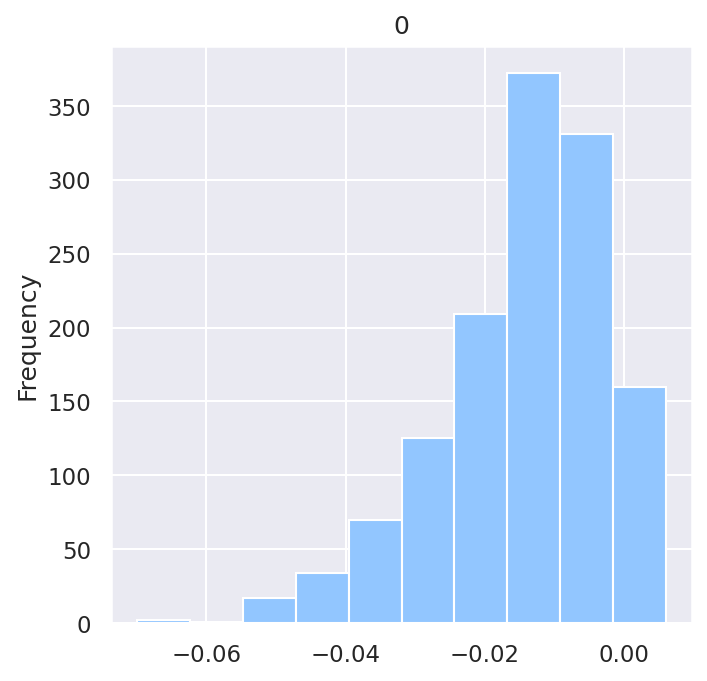

1
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



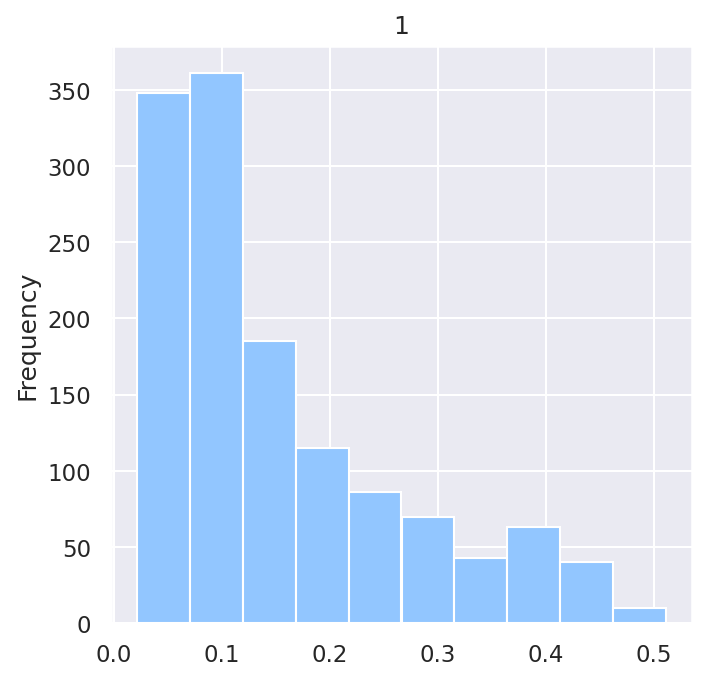

2
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



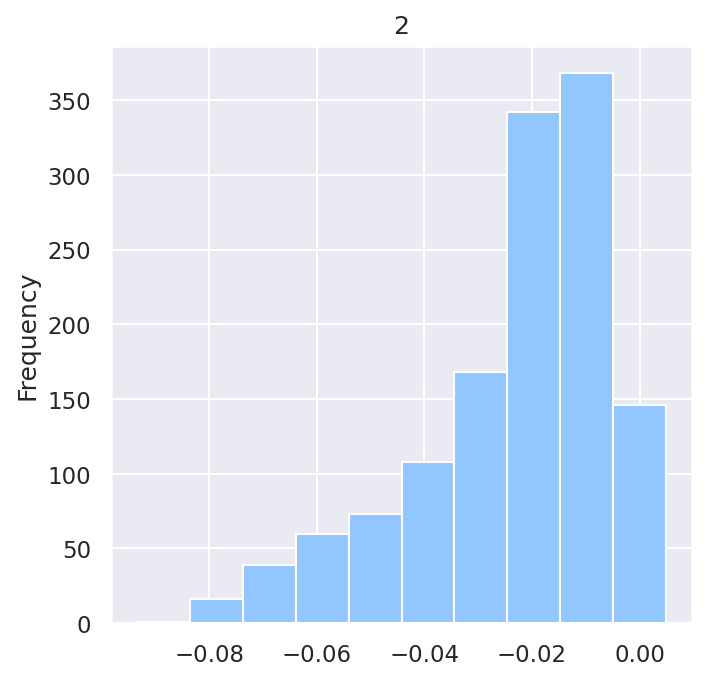

3
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



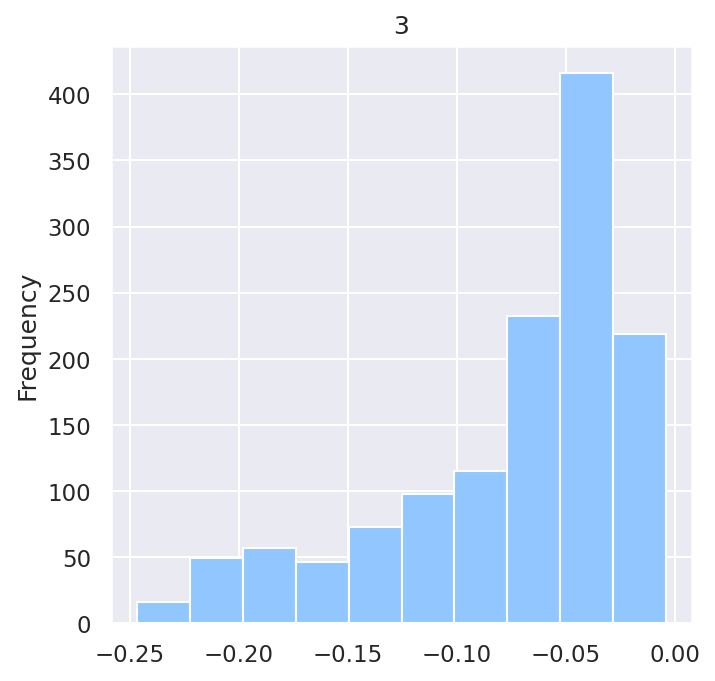

4
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



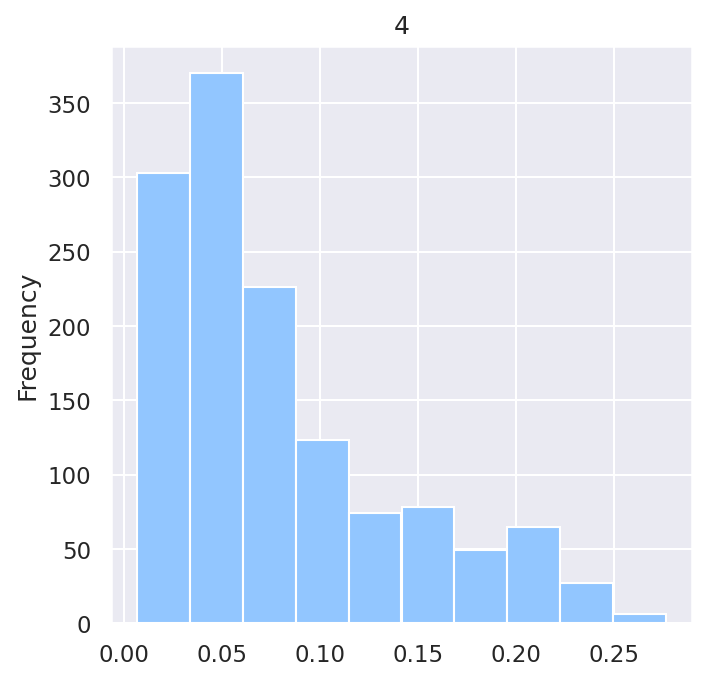

5
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



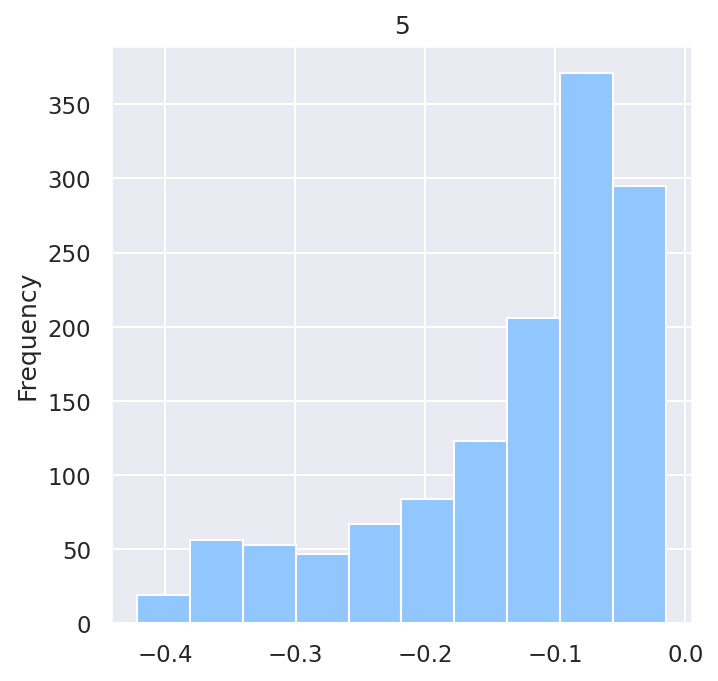

6
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



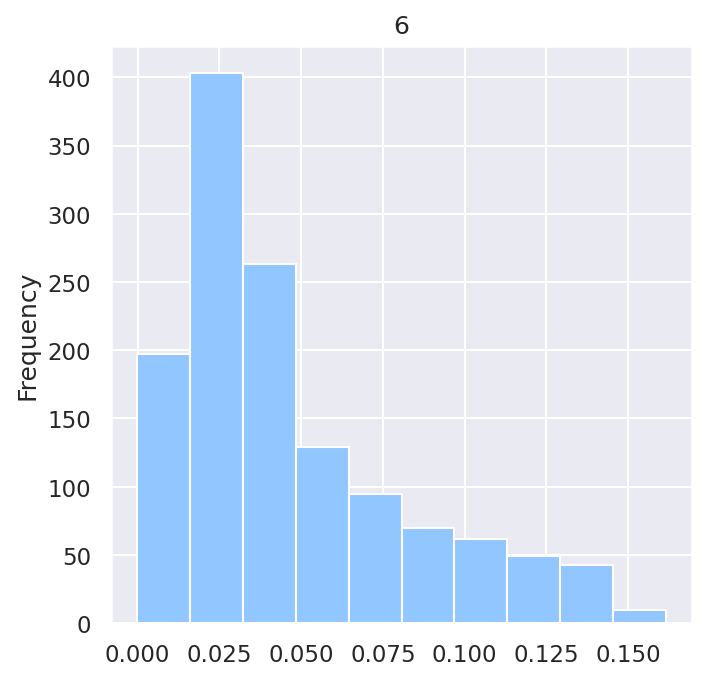

7
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



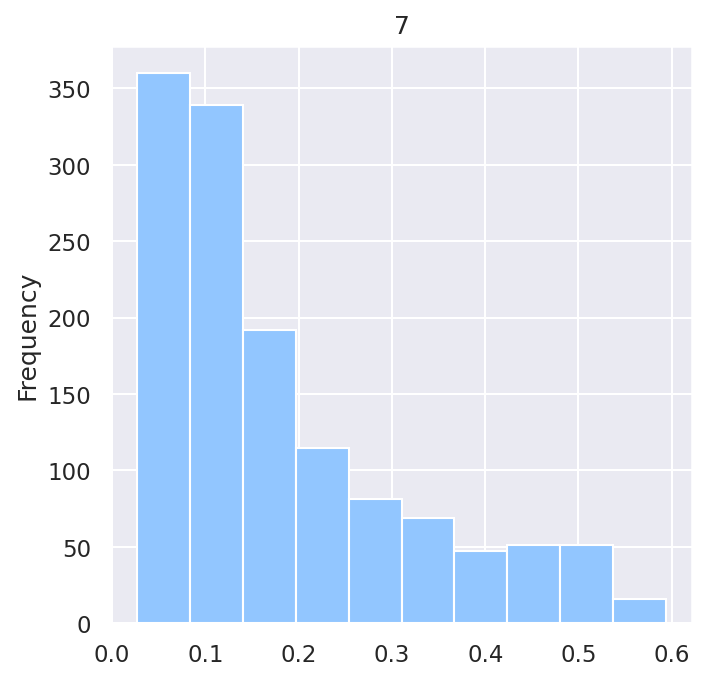

8
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



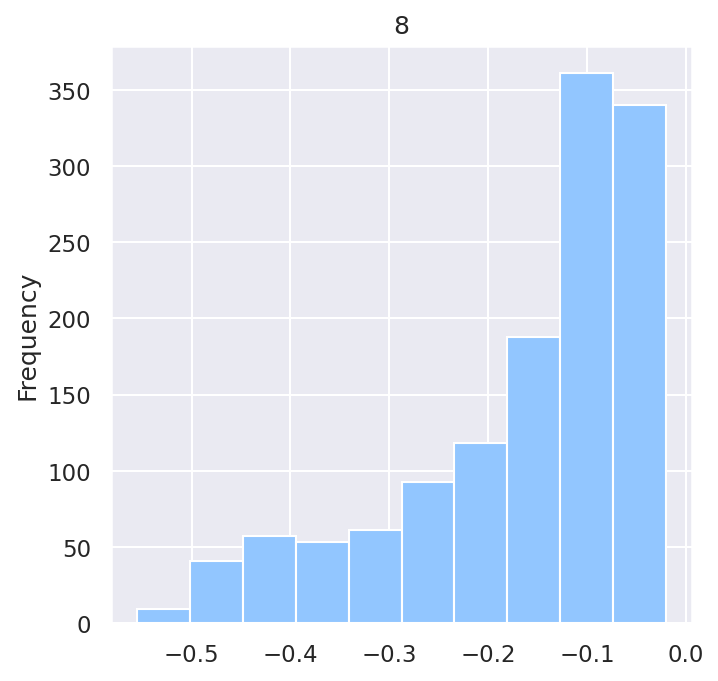

9
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



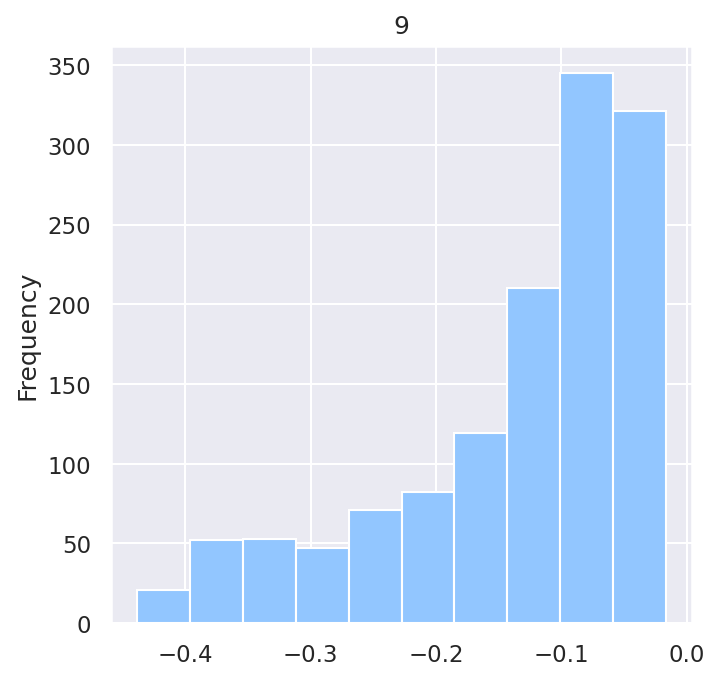

10
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



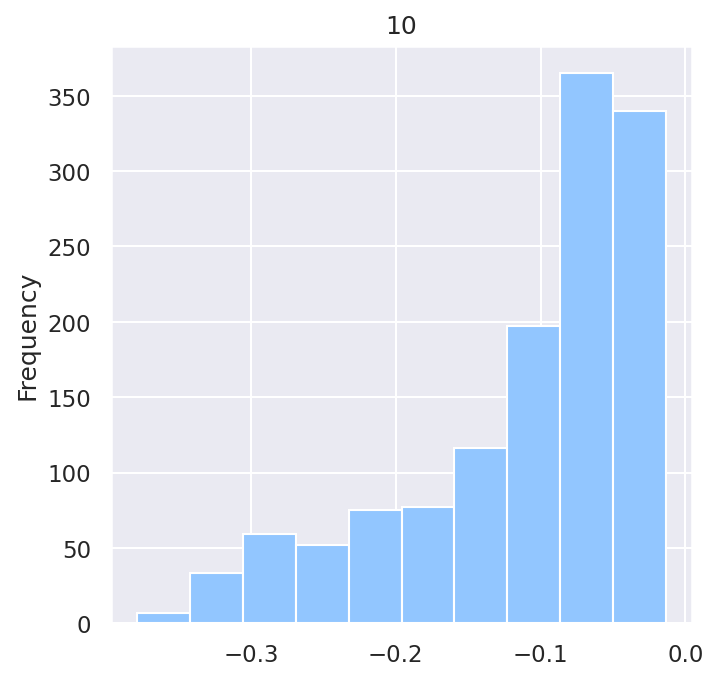

11
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



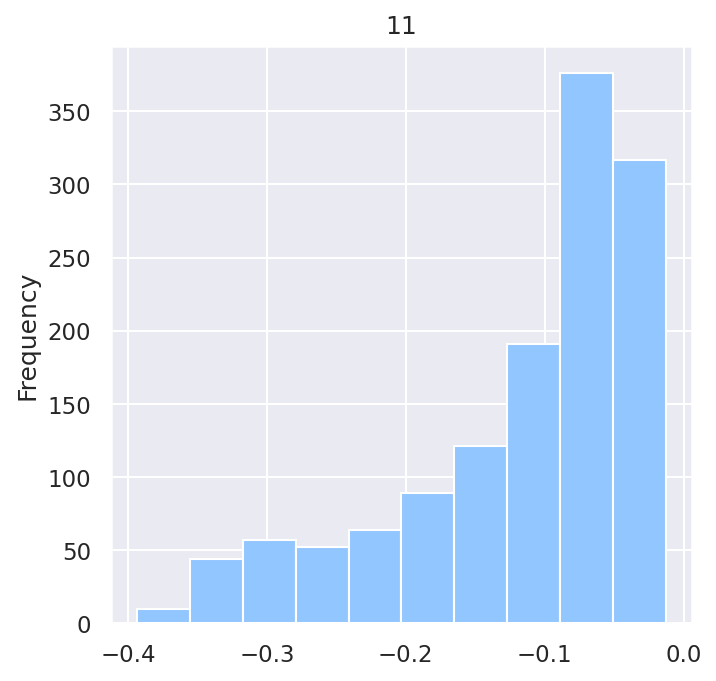

12
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



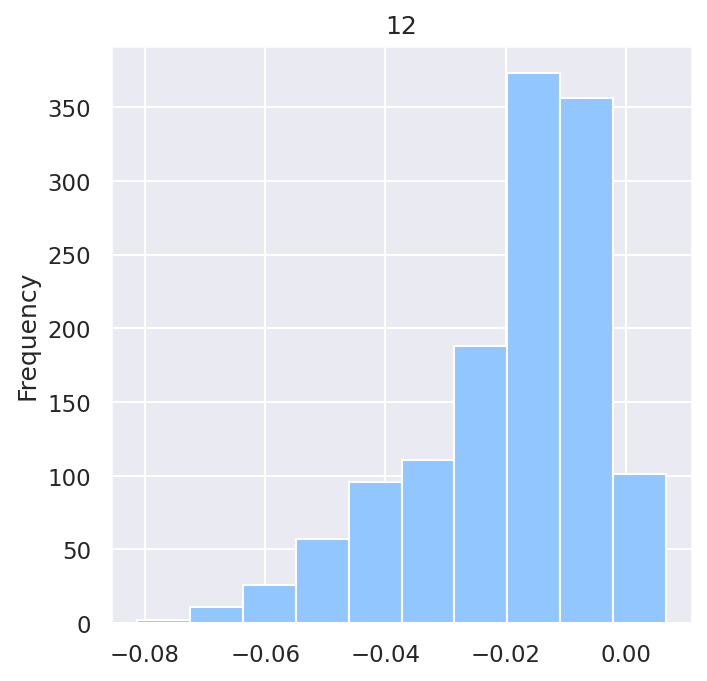

13
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



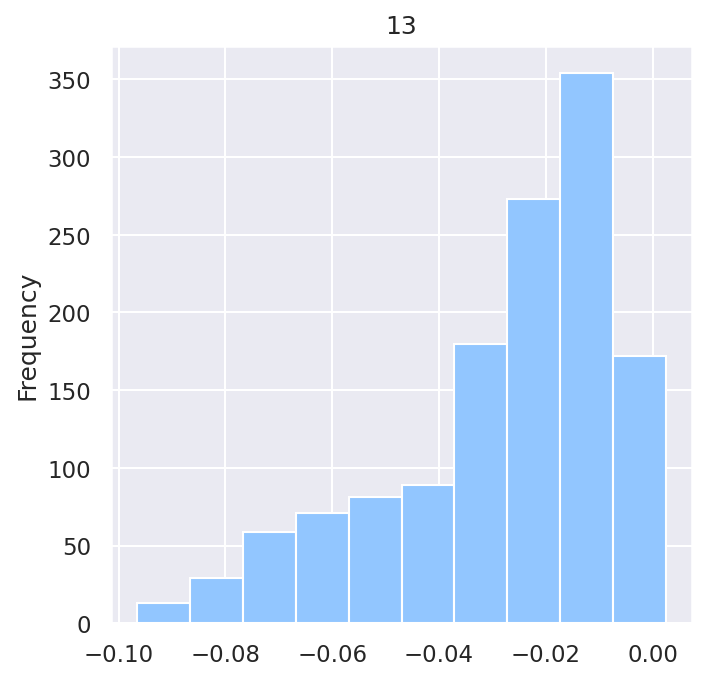

14
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



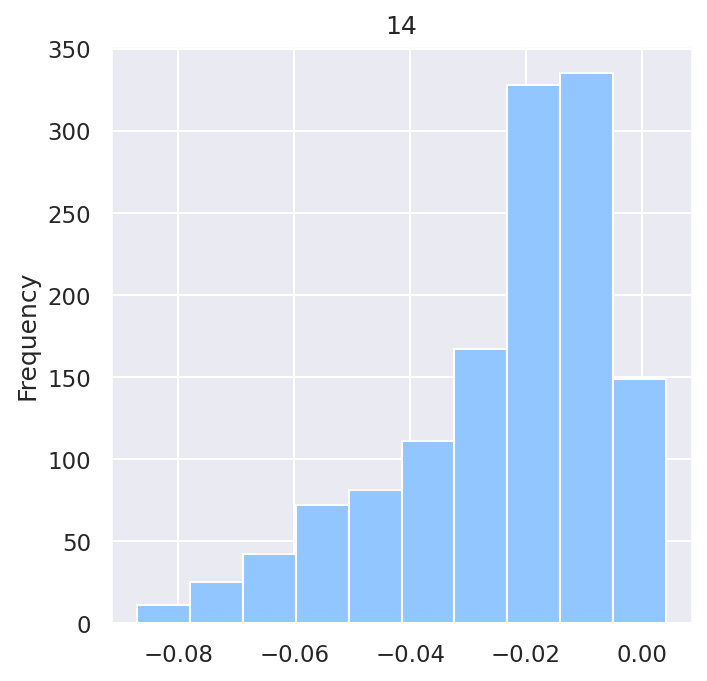

15
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



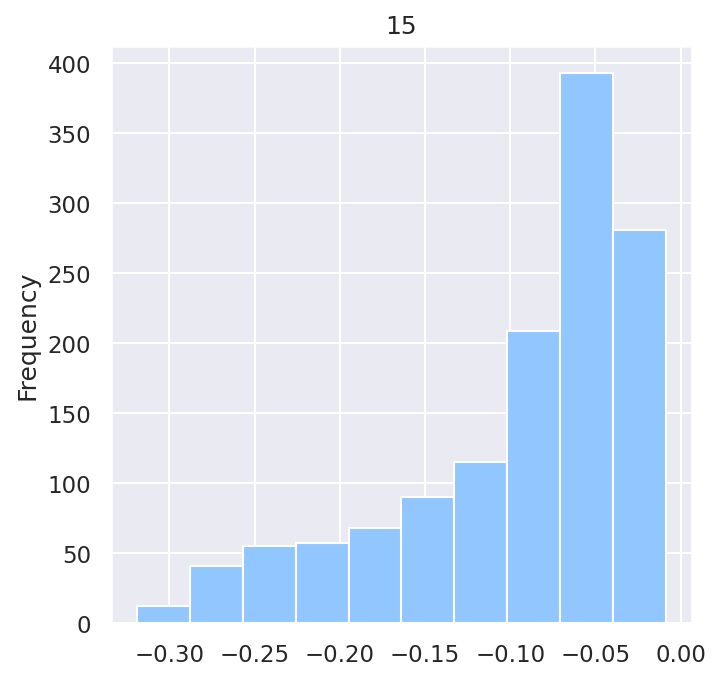

16
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



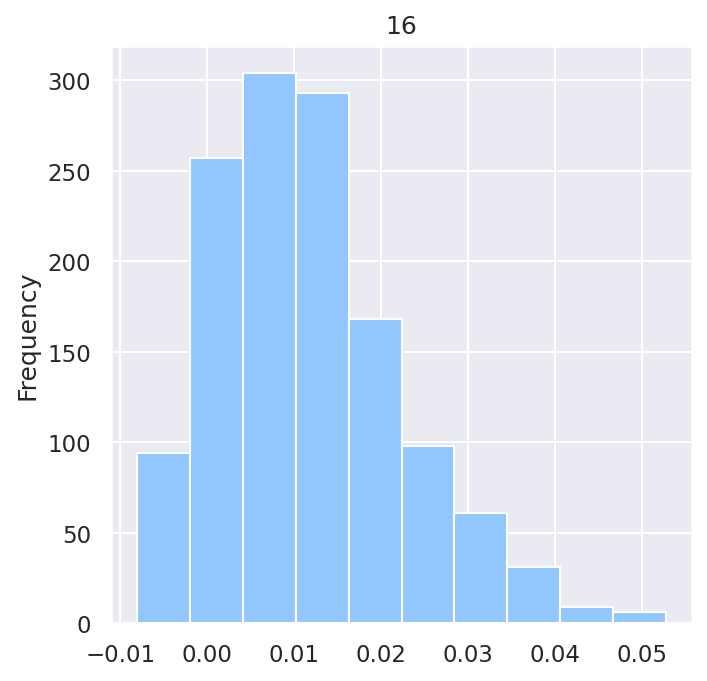

17
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



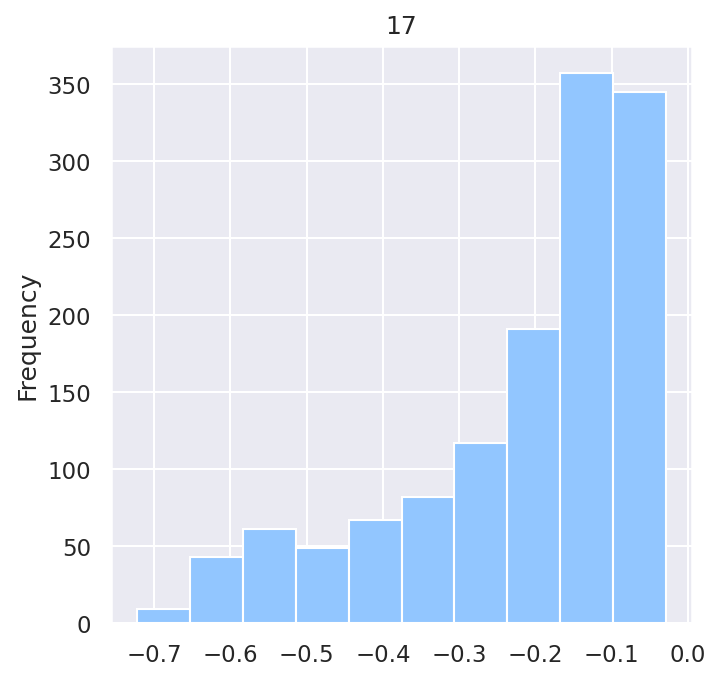

18
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



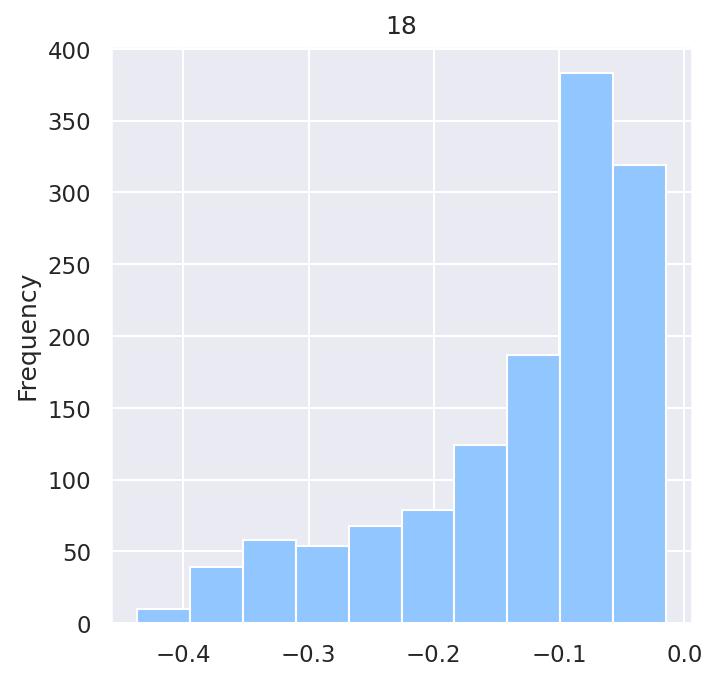

19
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



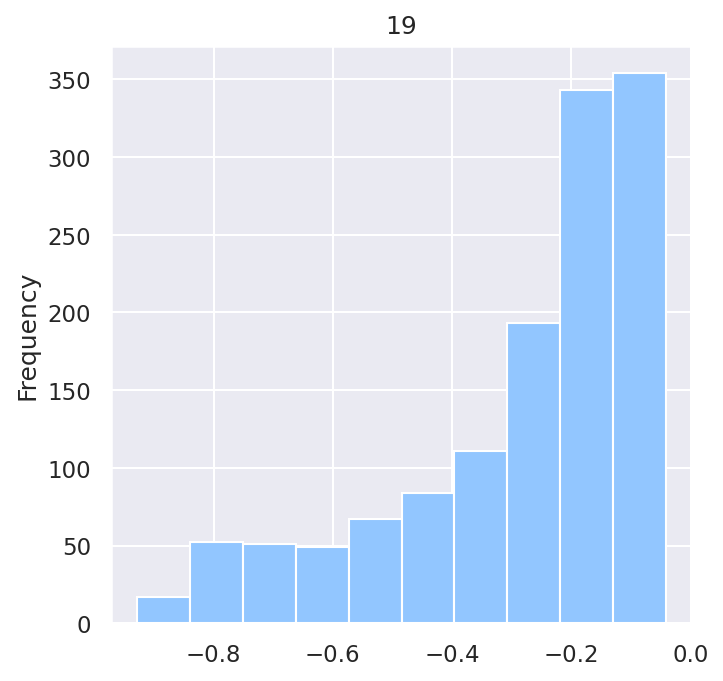

20
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



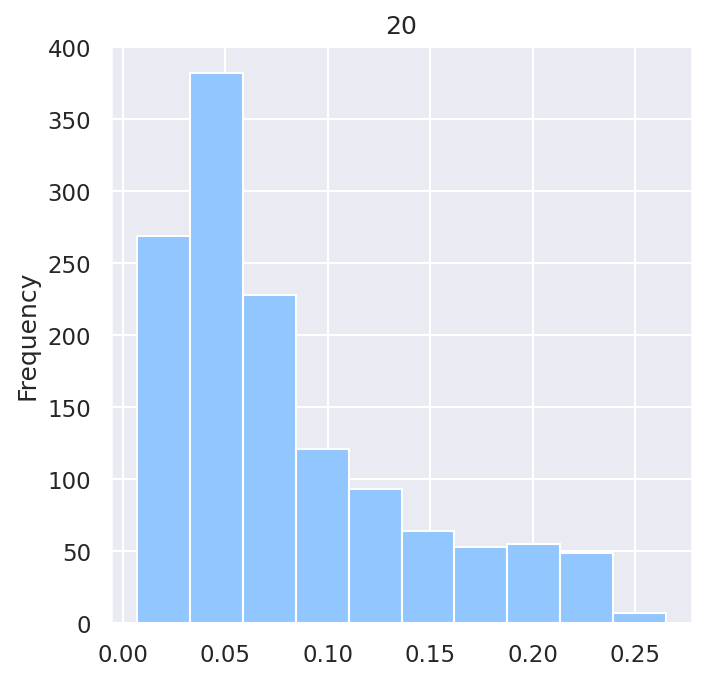

21
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



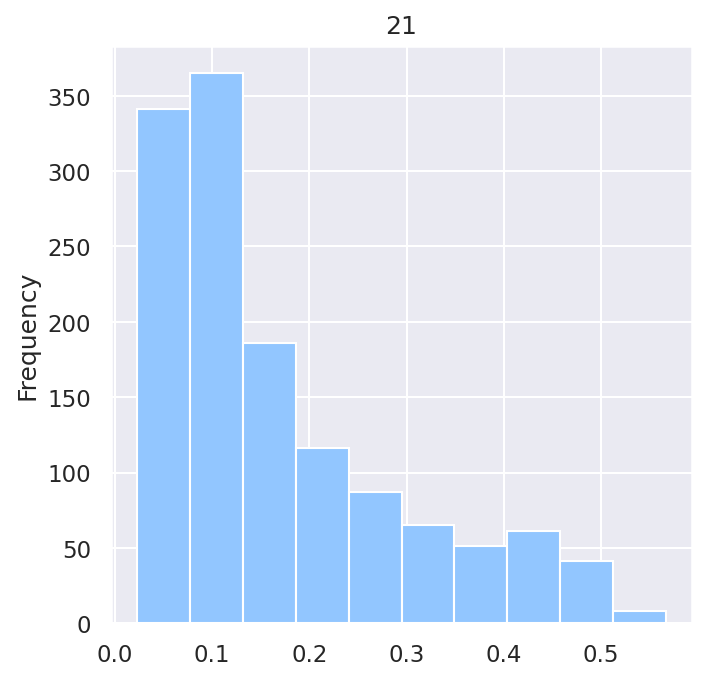

22
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



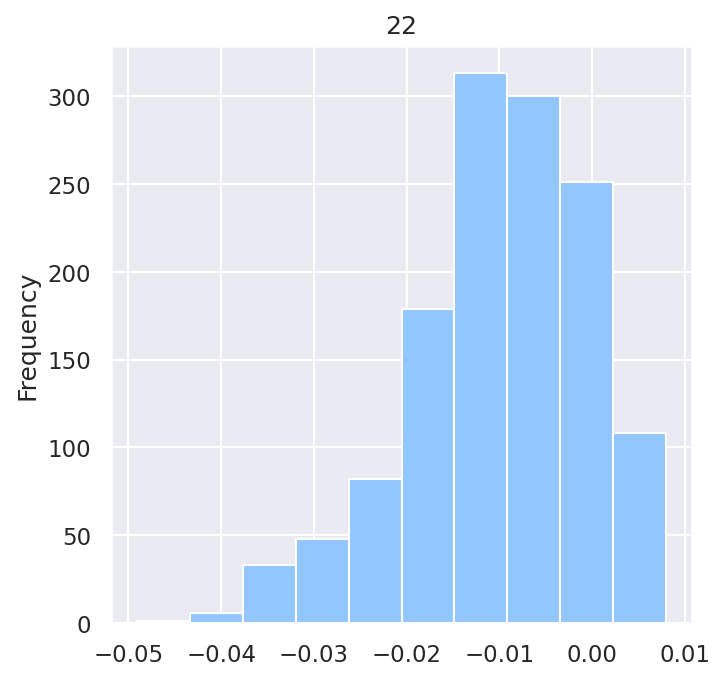

23
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



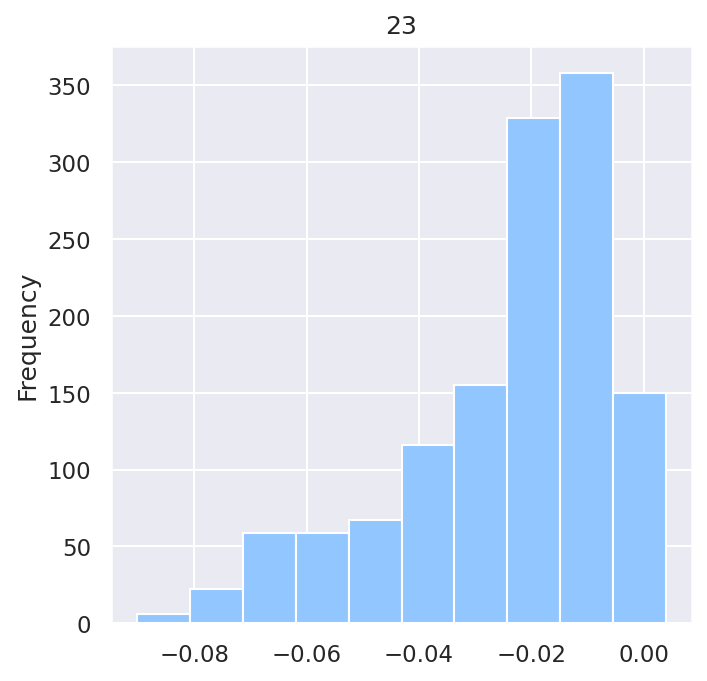

24
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



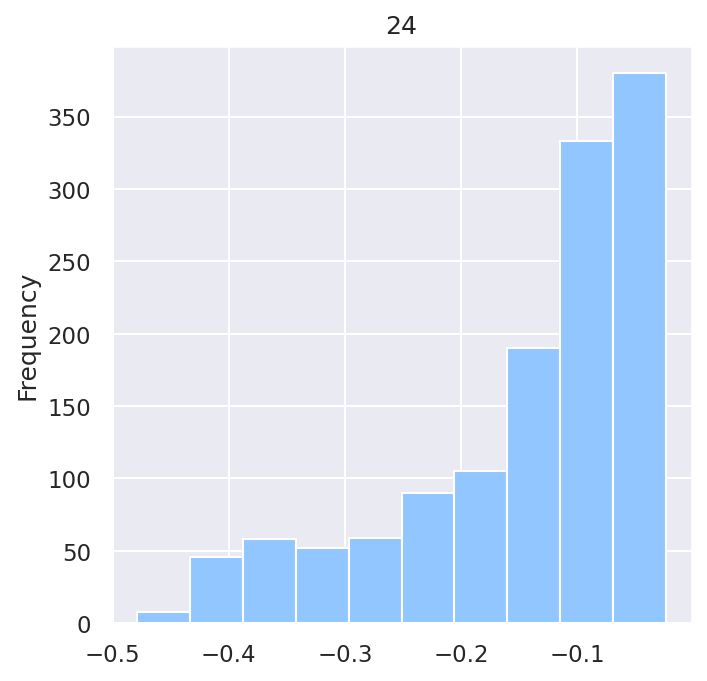

25
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



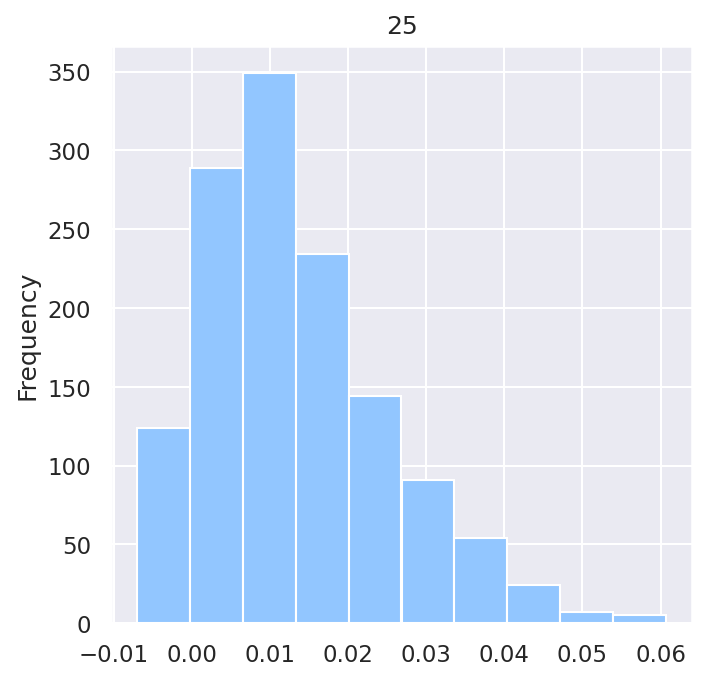

26
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



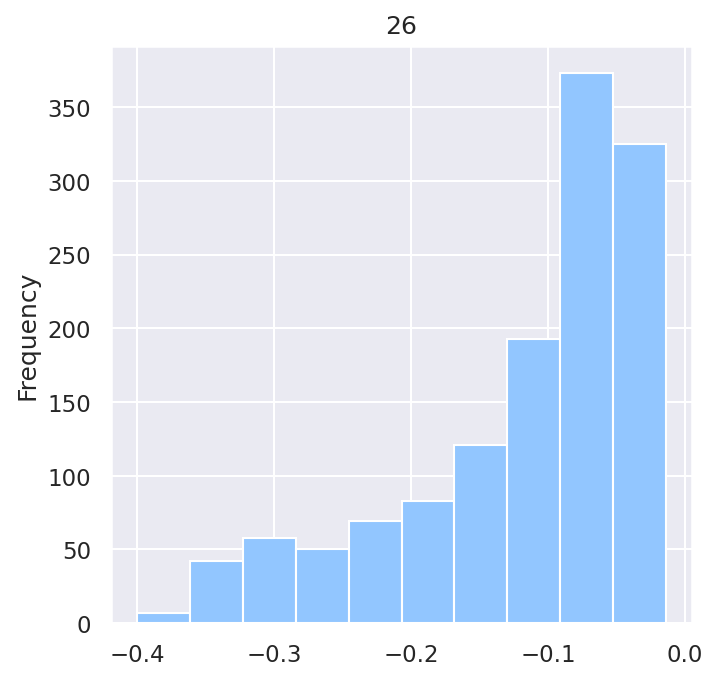

27
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



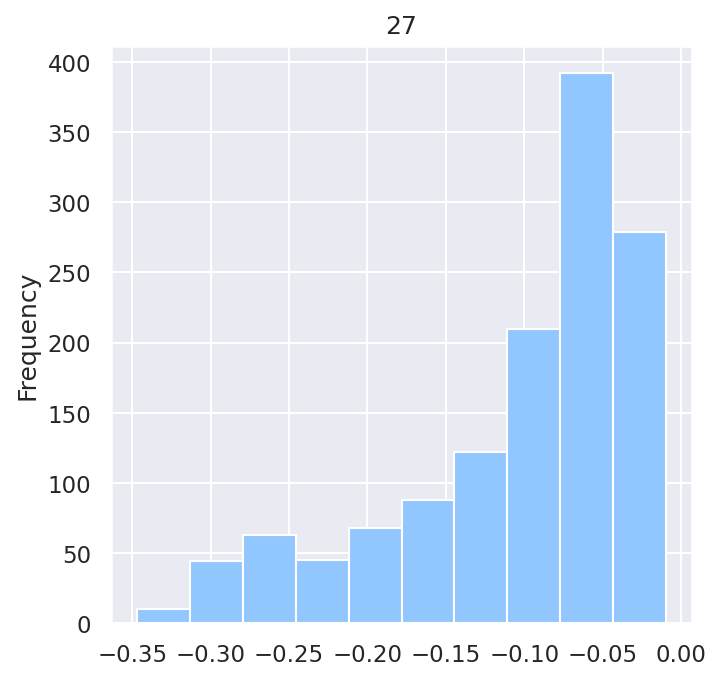

28
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



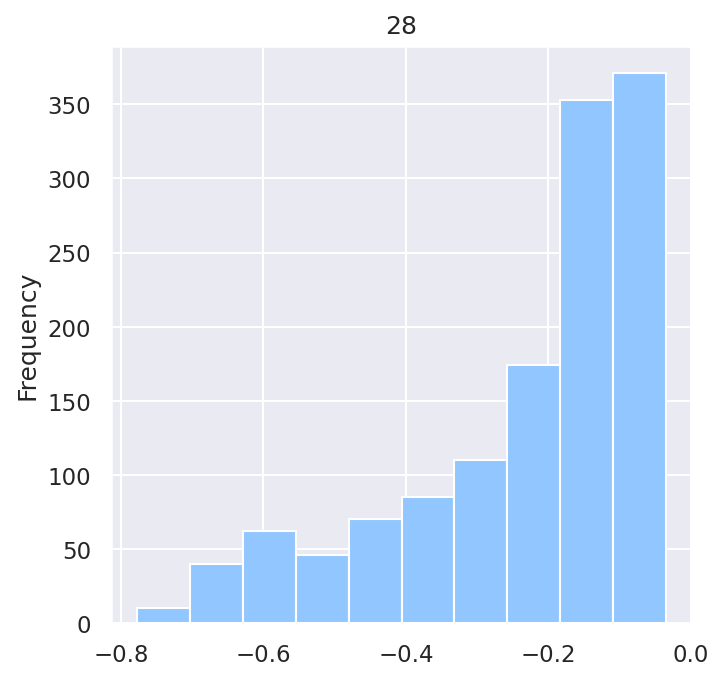

29
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



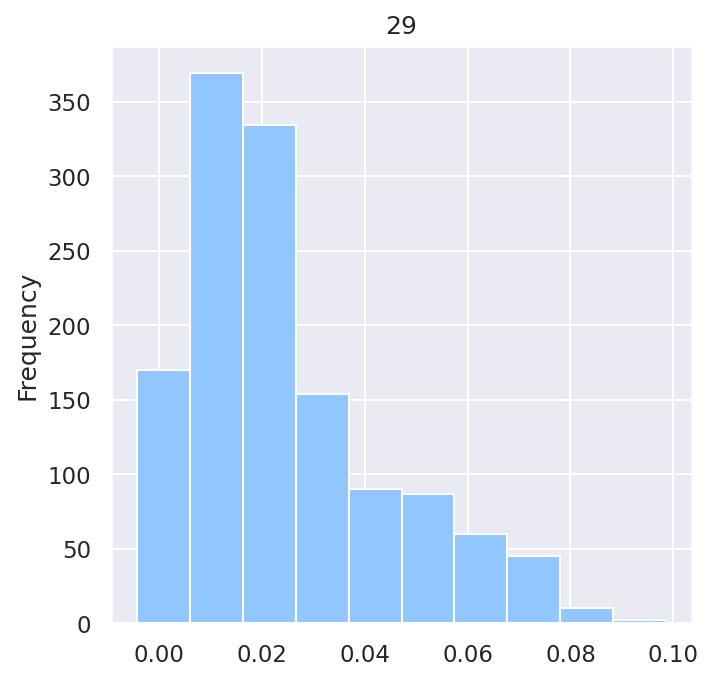

30
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



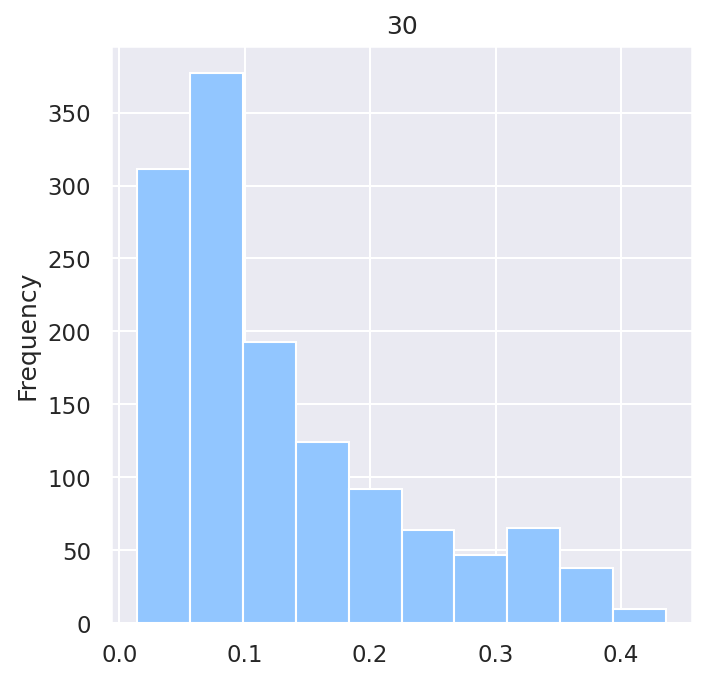

31
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



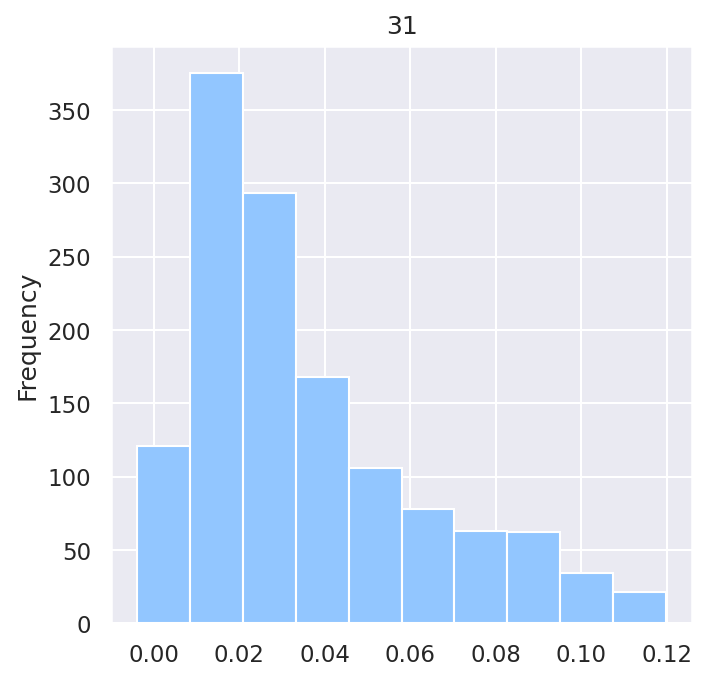

32
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



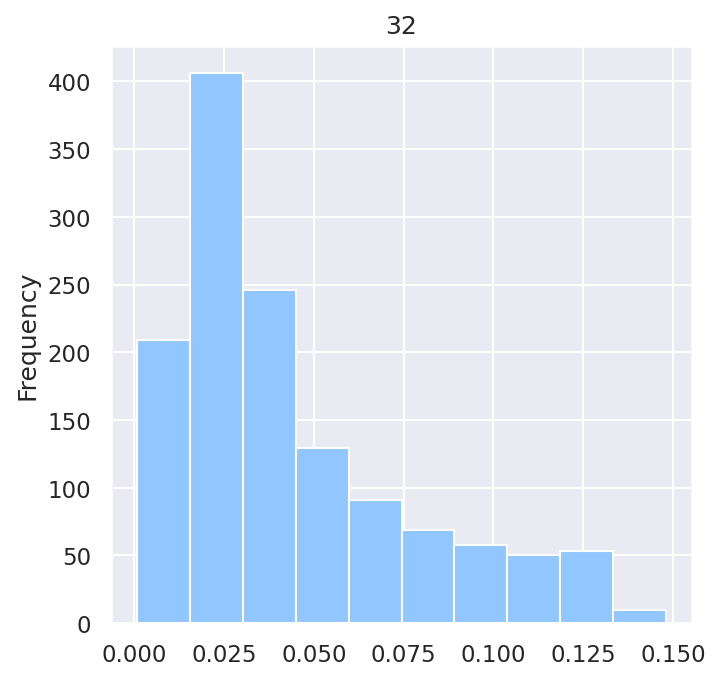

33
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



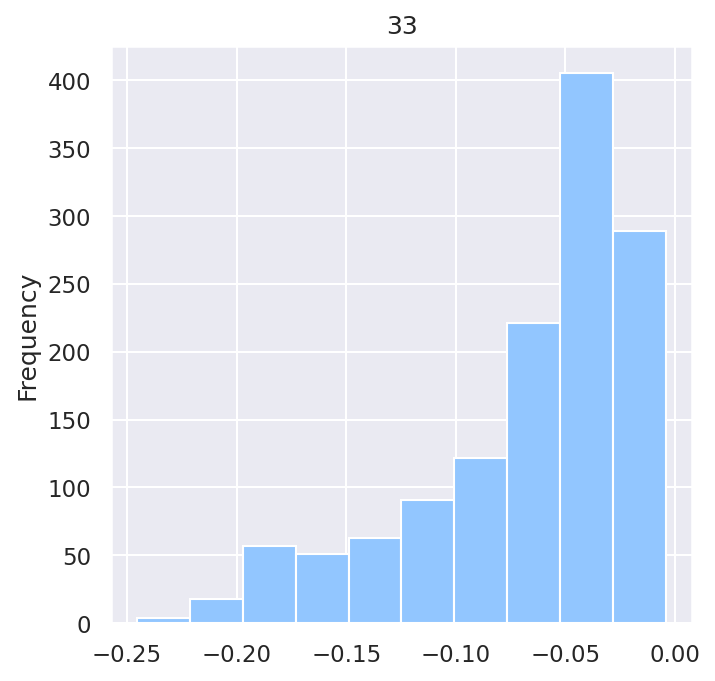

34
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



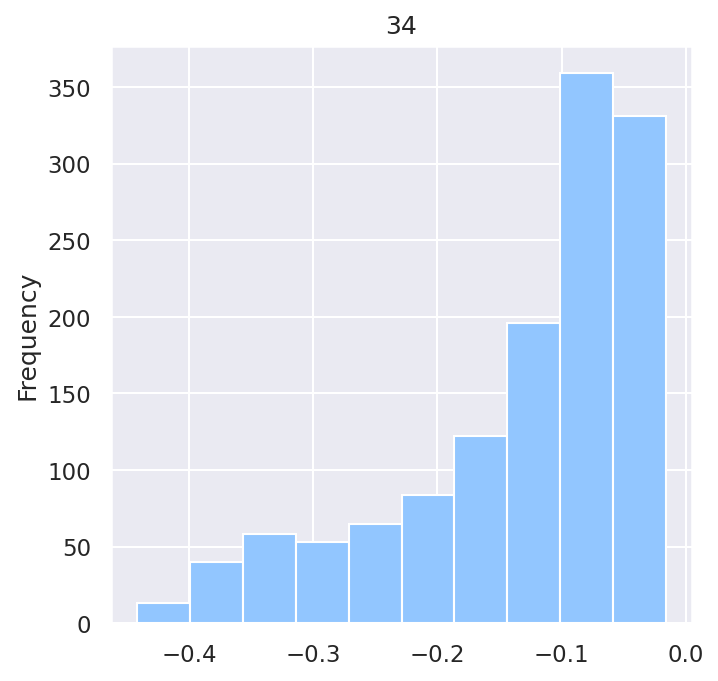

35
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



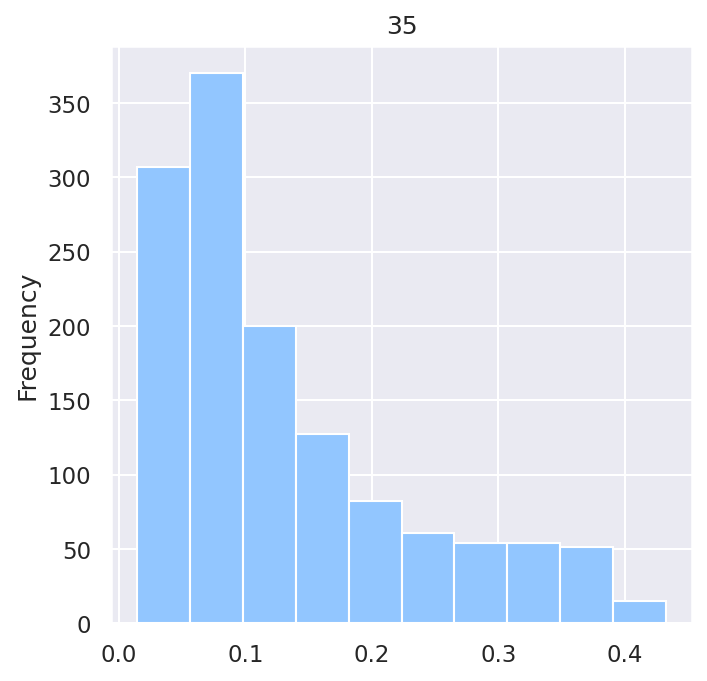

36
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



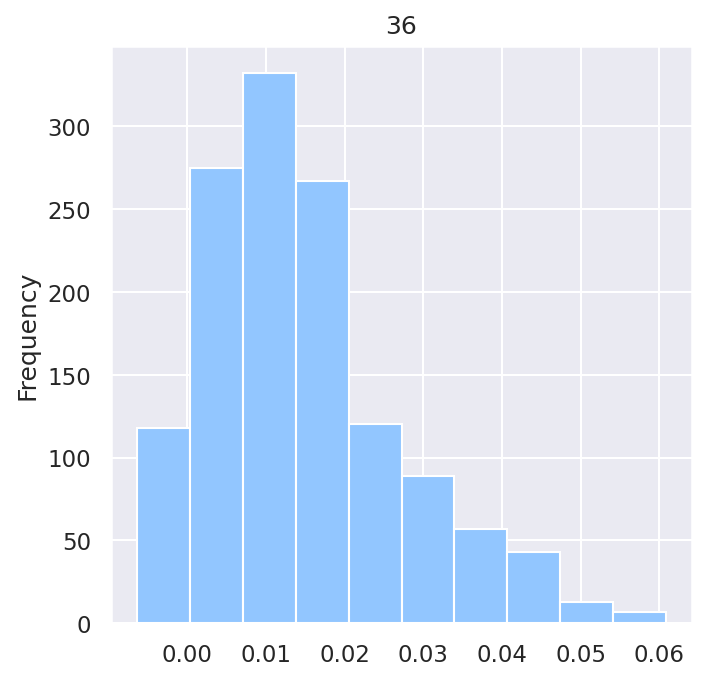

37
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



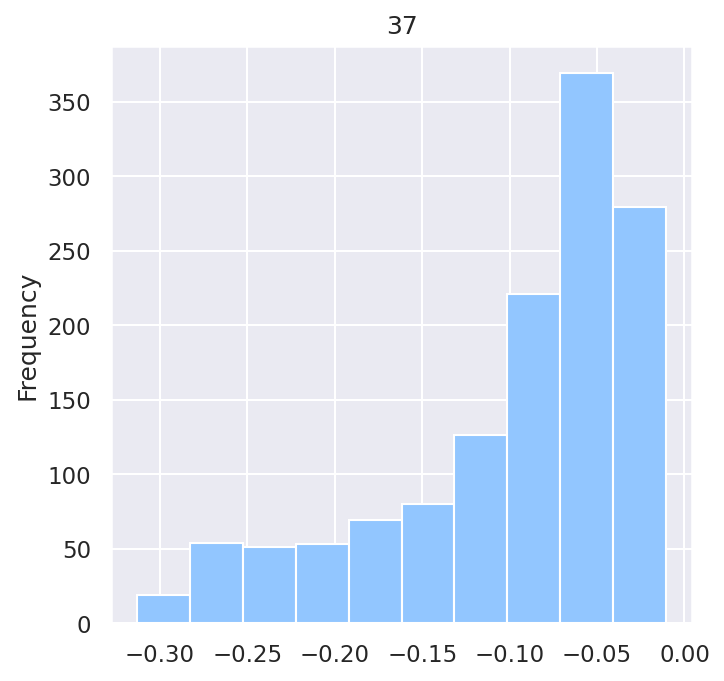

38
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



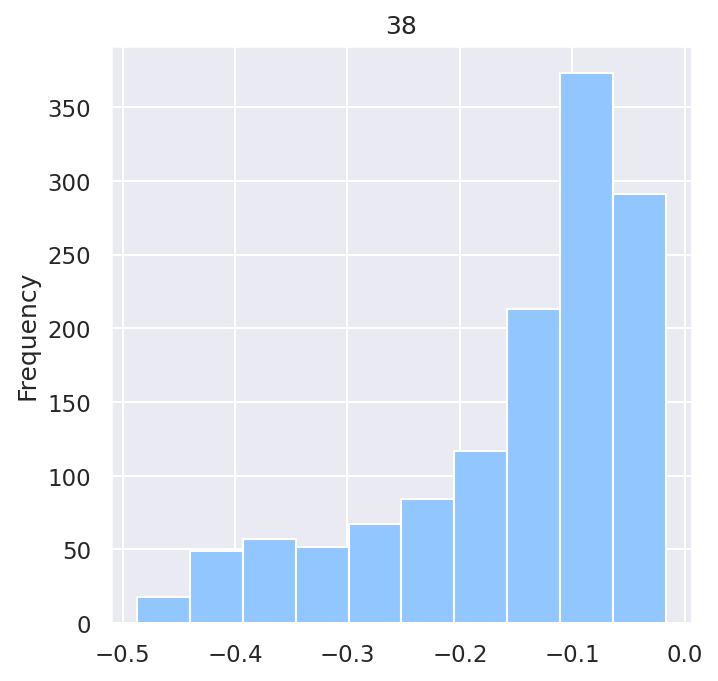

39
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



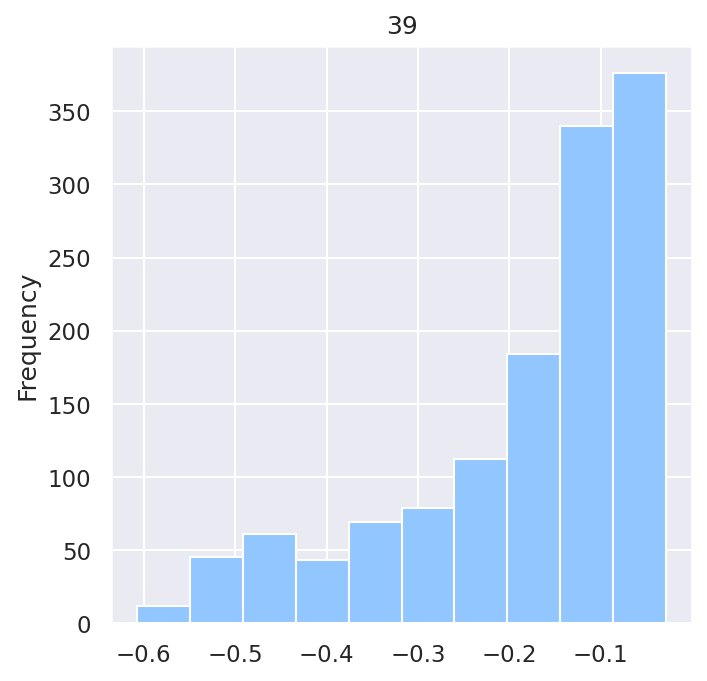

40
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



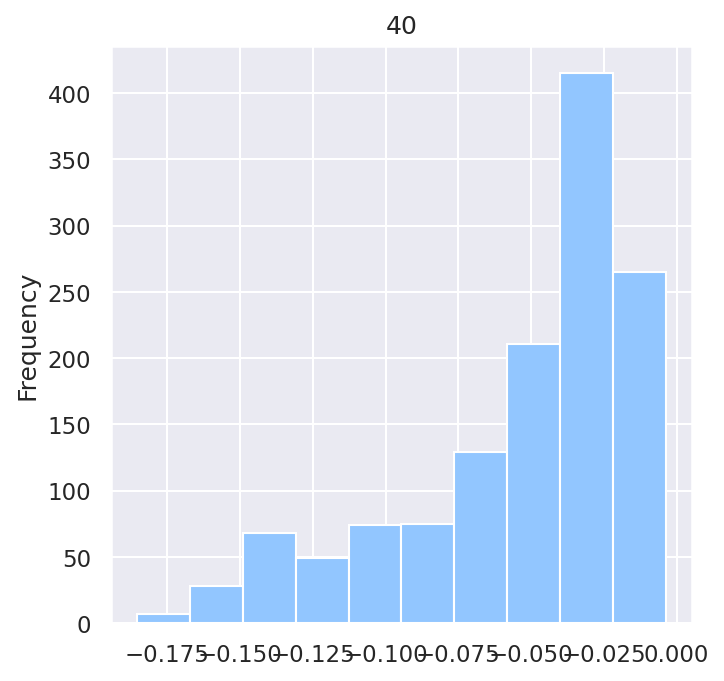

41
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



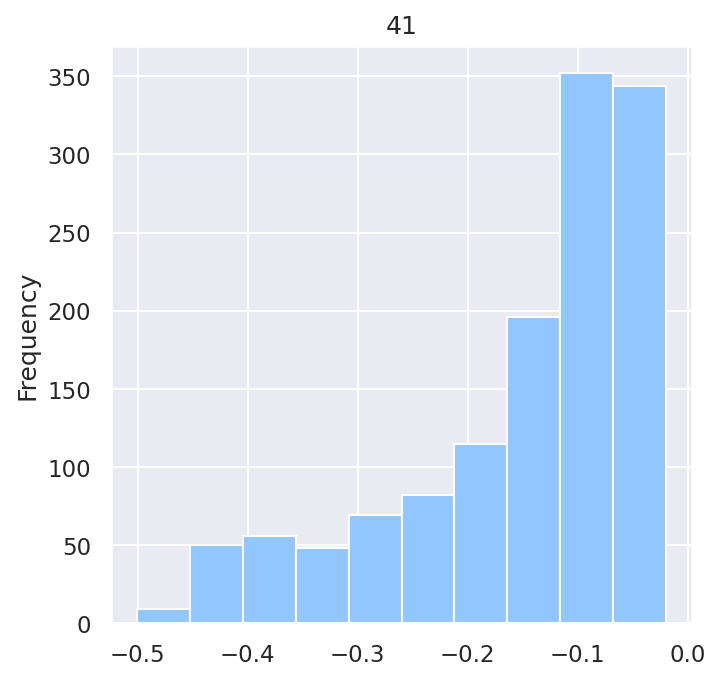

42
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



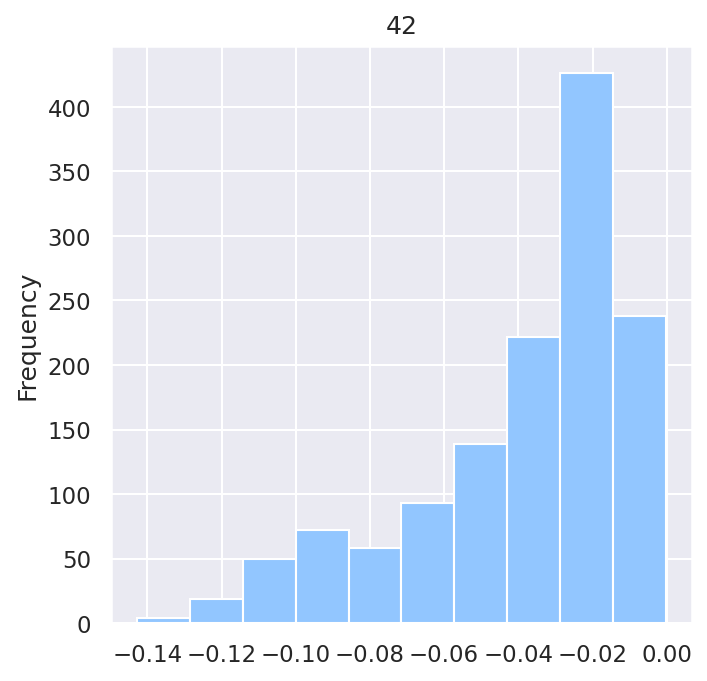

43
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



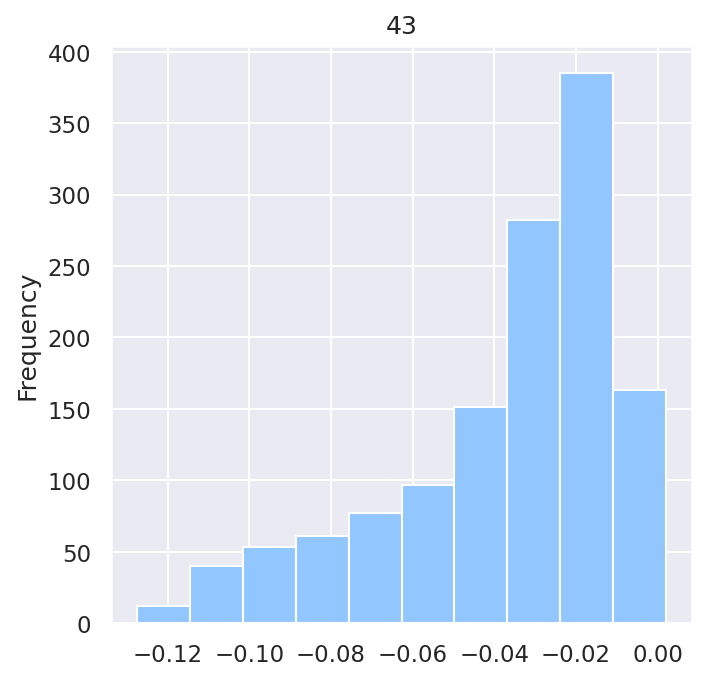

44
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



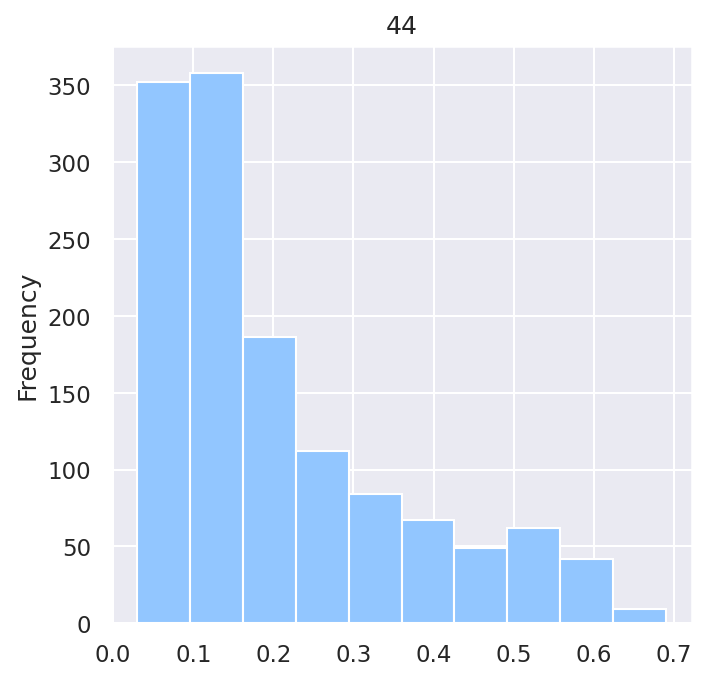

45
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



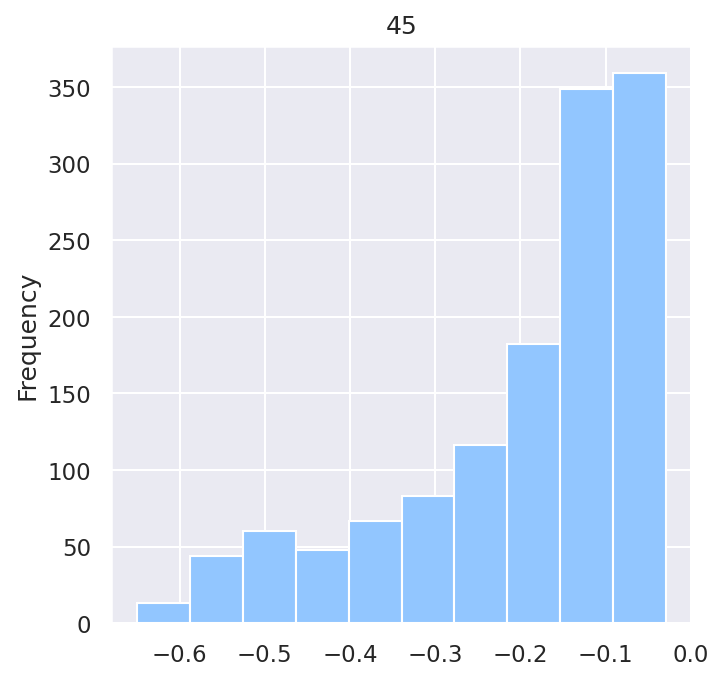

46
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



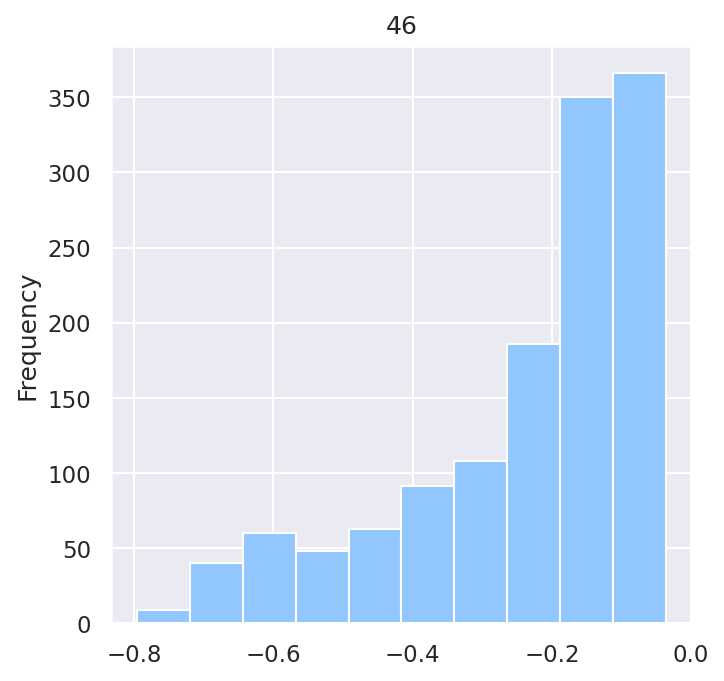

47
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



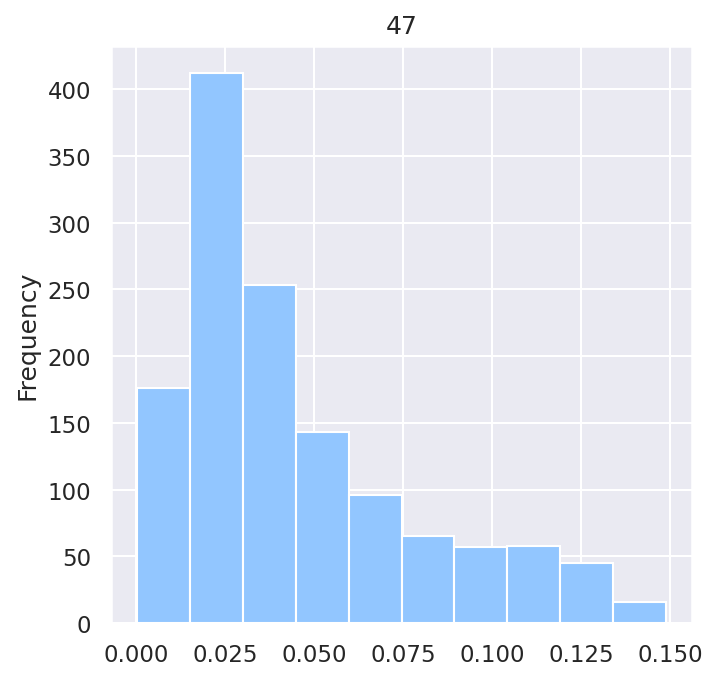

48
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



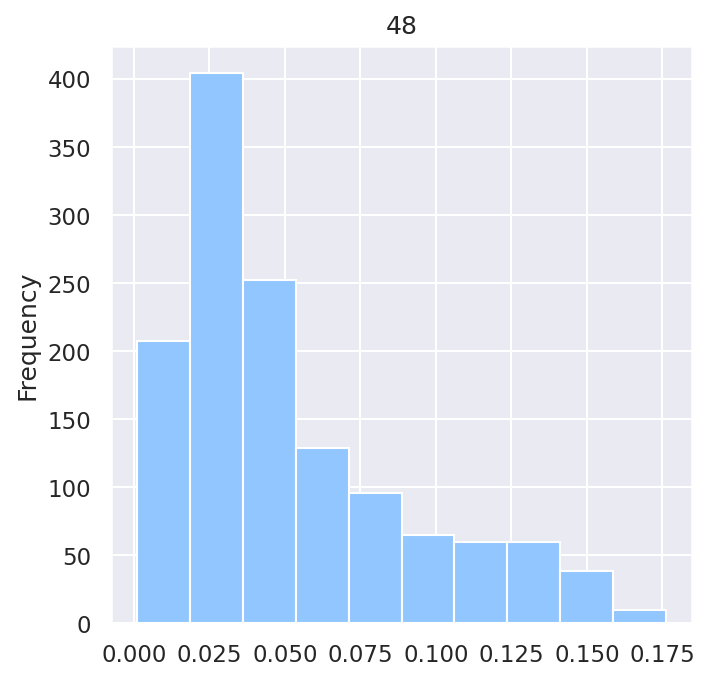

49
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



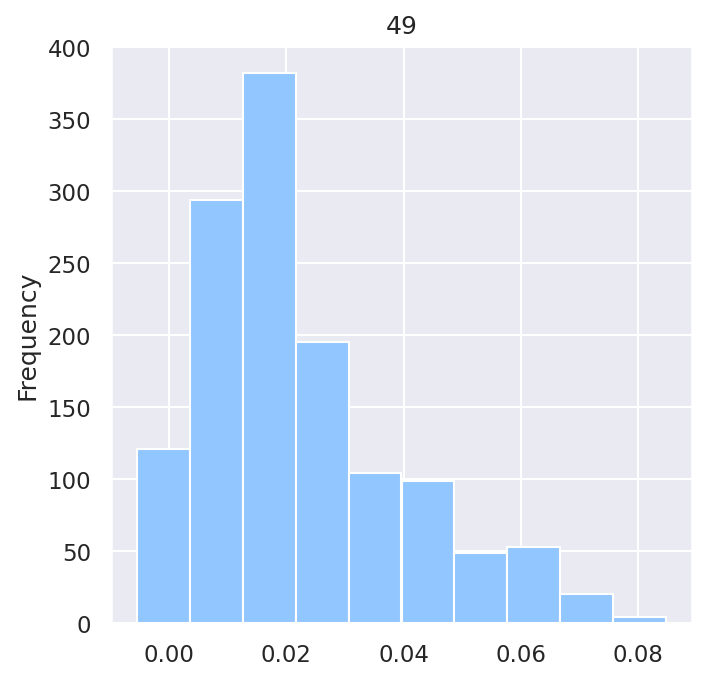

50
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



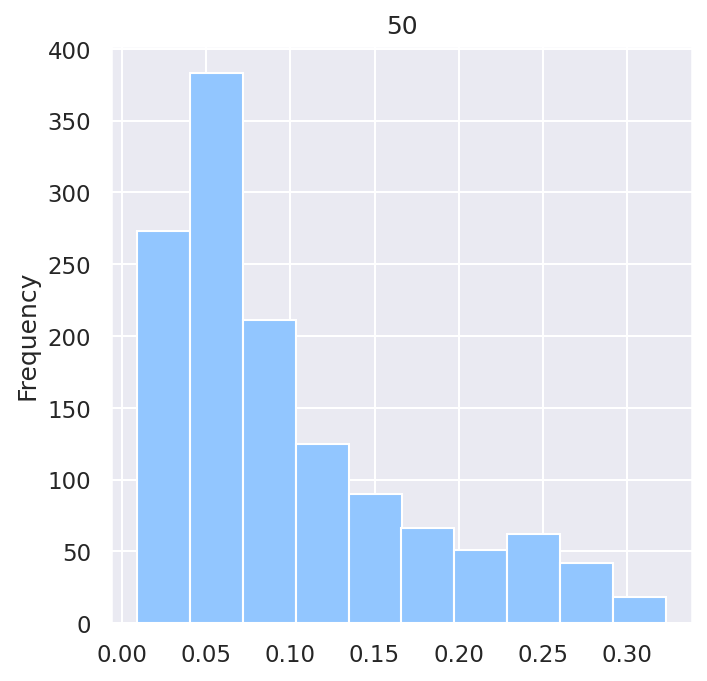

51
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



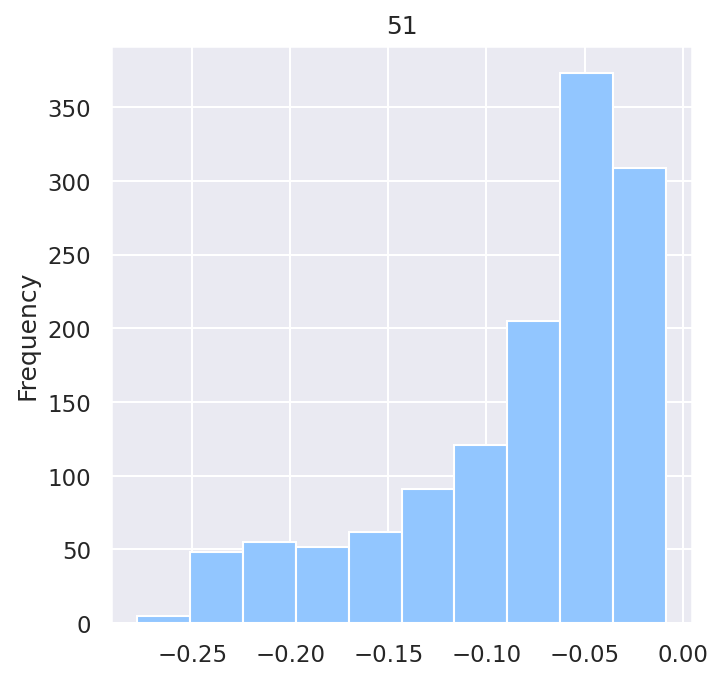

52
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



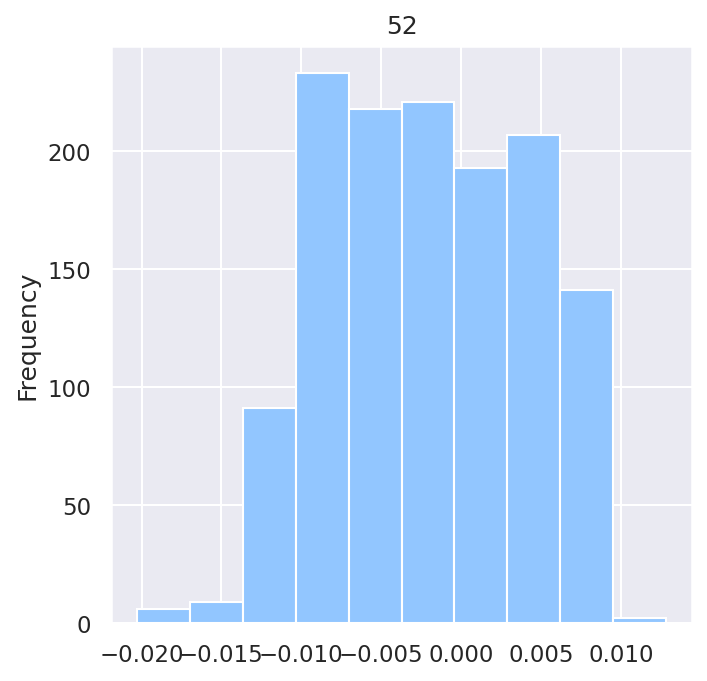

53
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



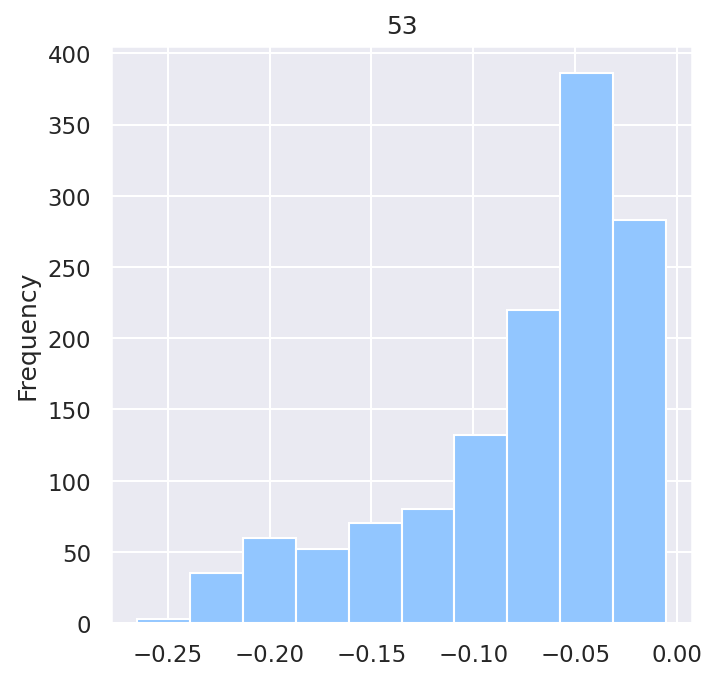

54
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



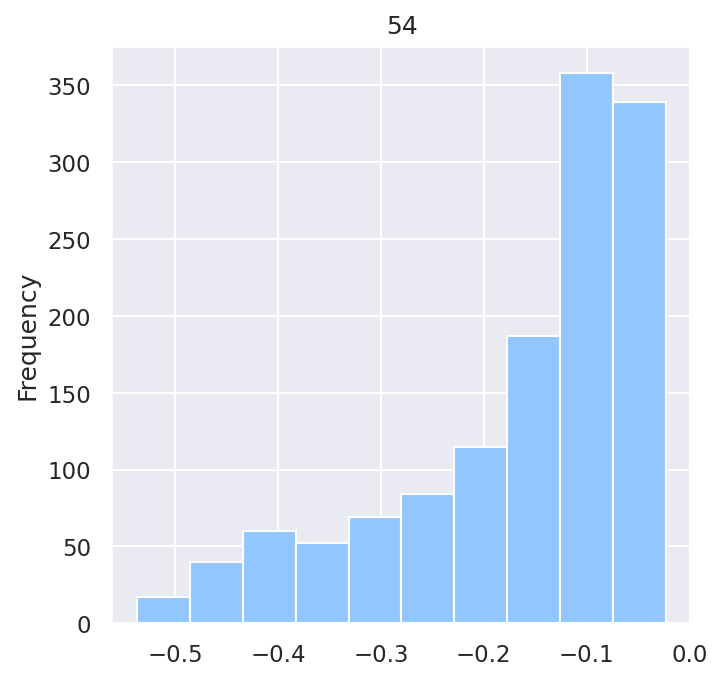

55
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



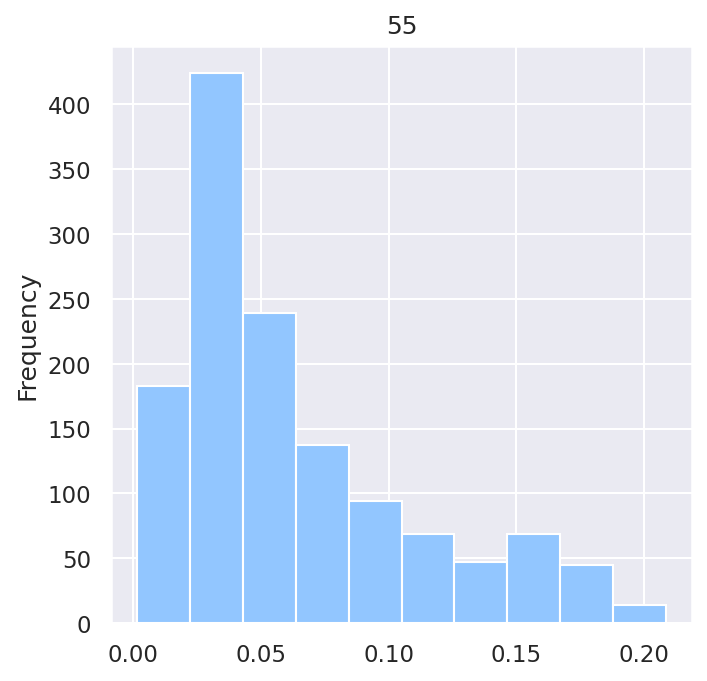

56
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



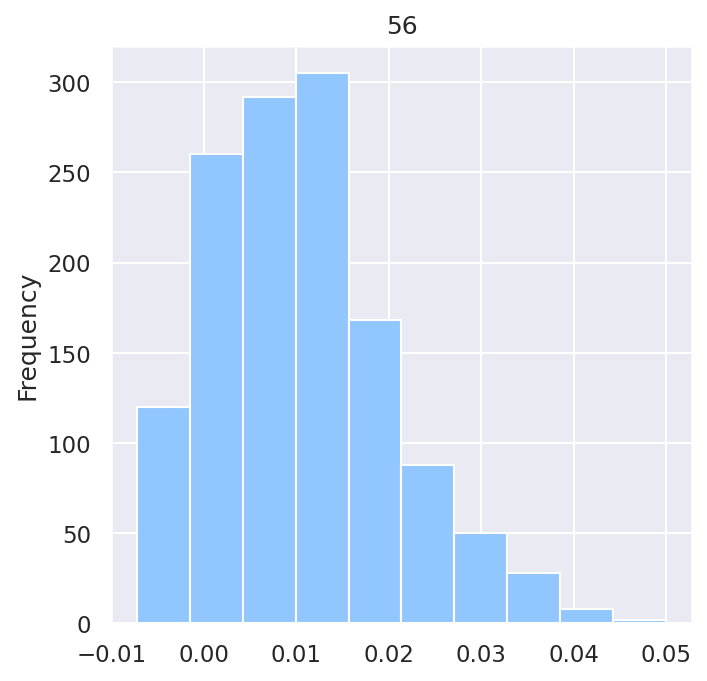

57
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



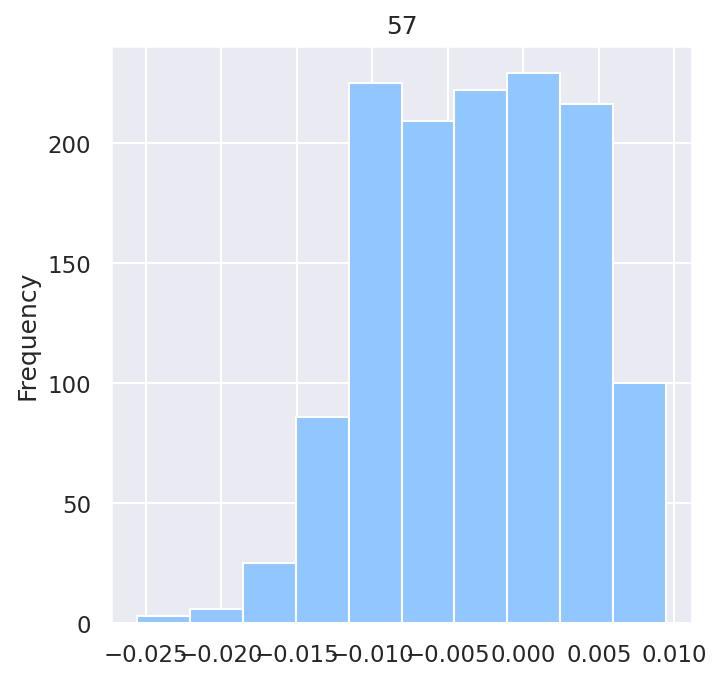

58
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



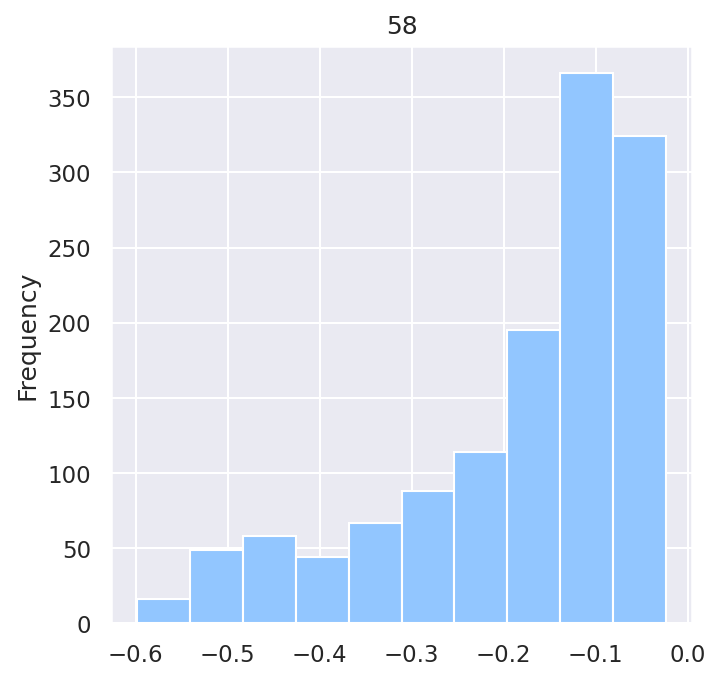

59
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



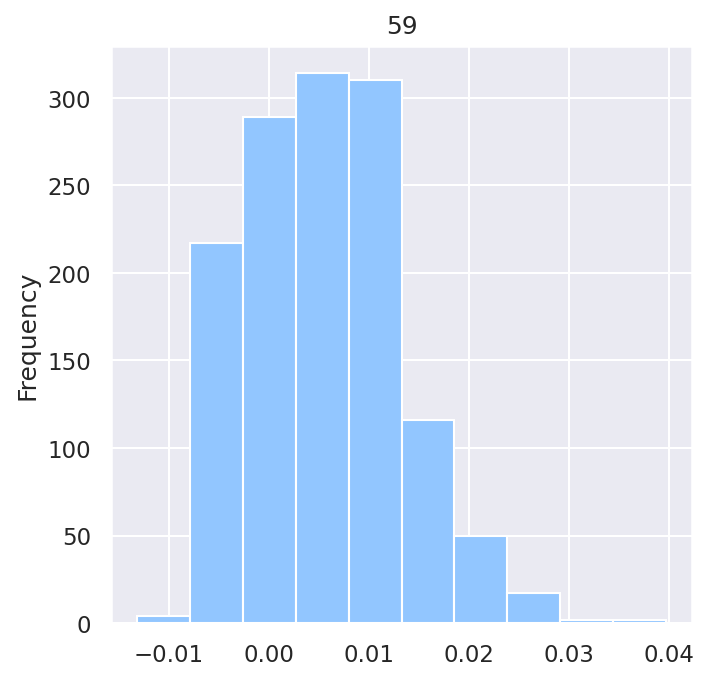

60
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



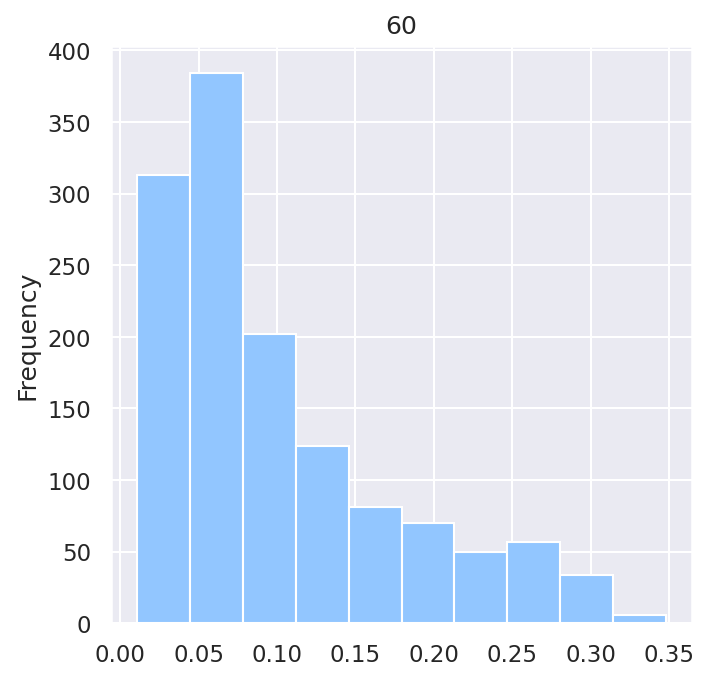

61
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



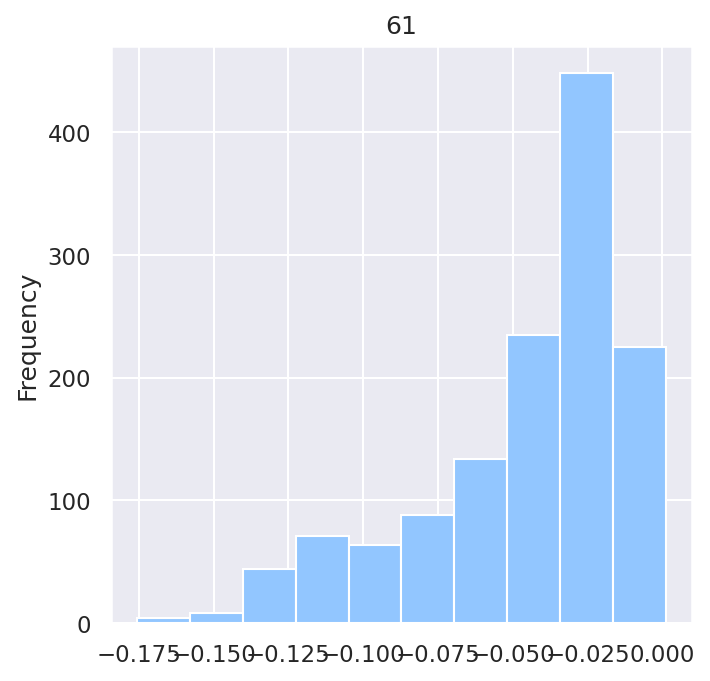

62
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



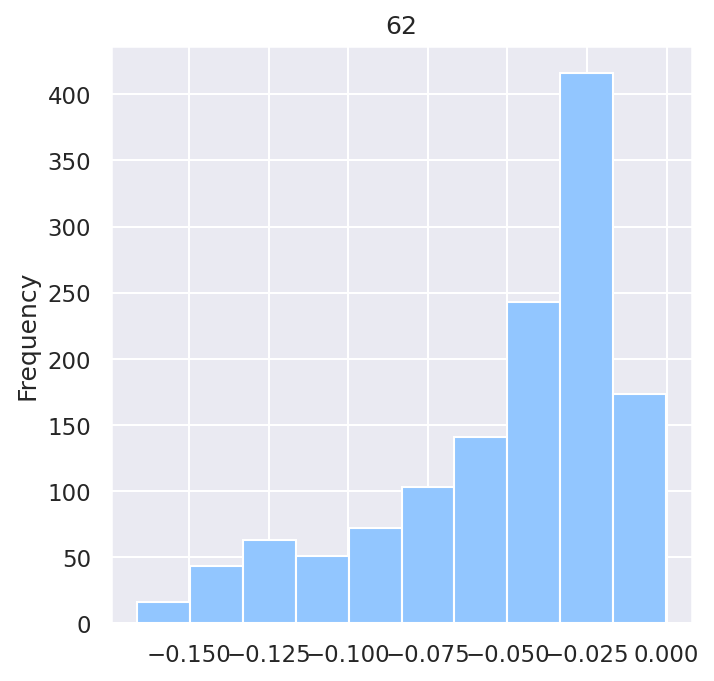

63
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



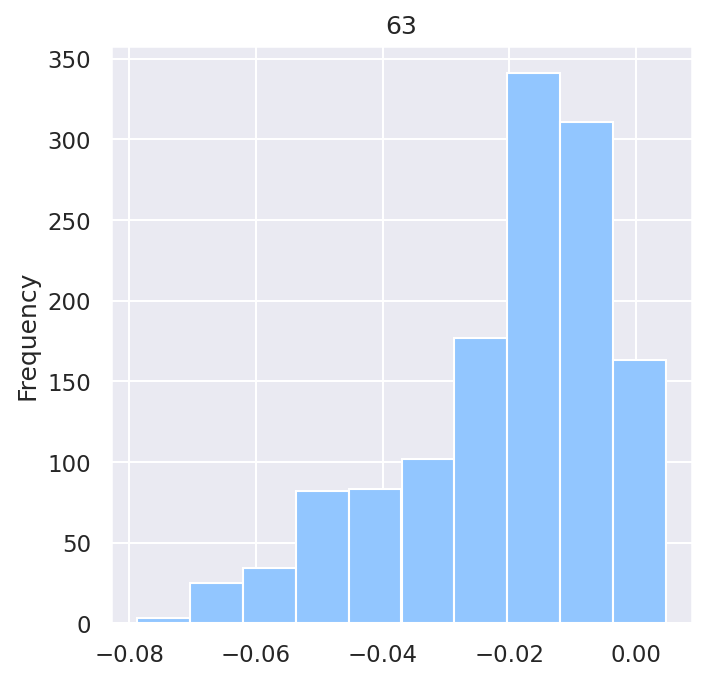

64
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



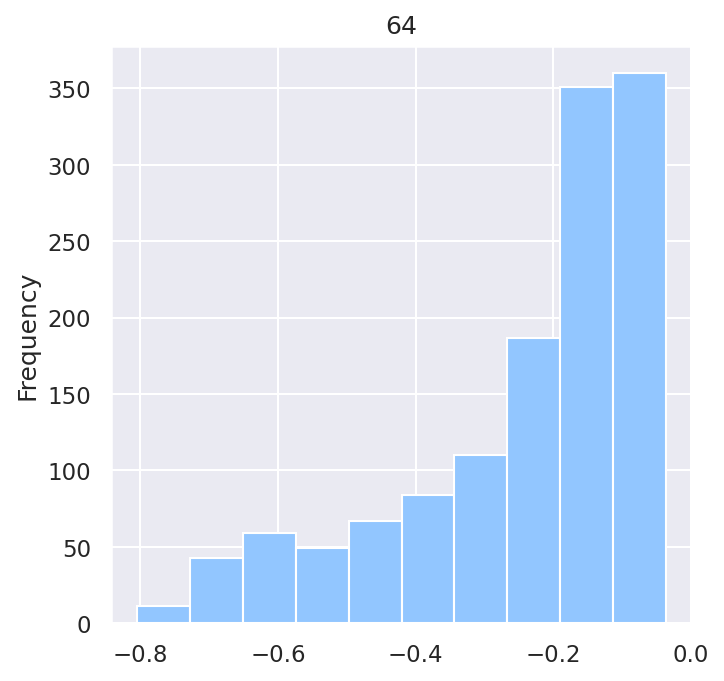

65
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



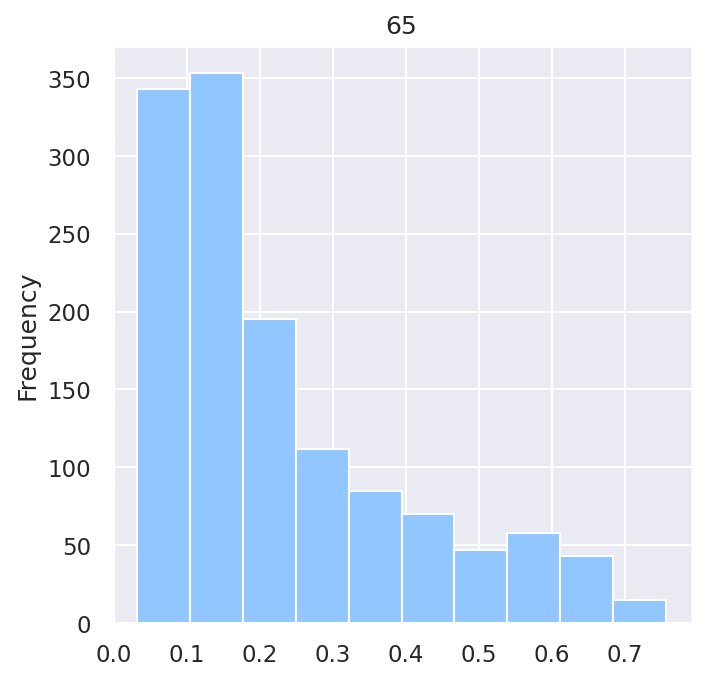

66
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



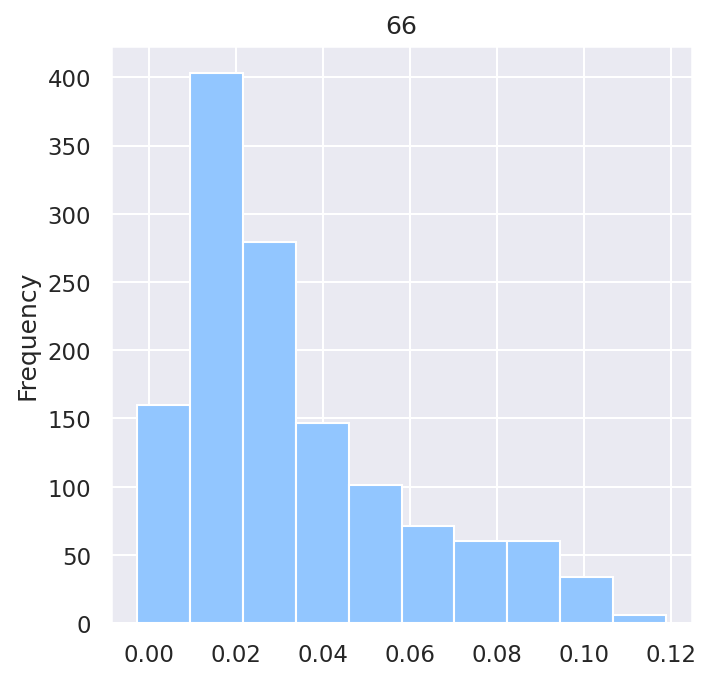

67
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



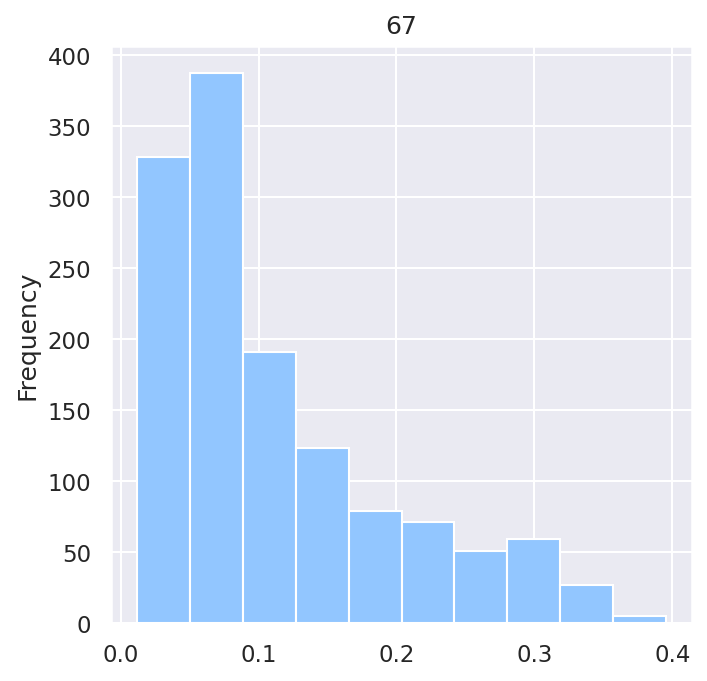

68
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



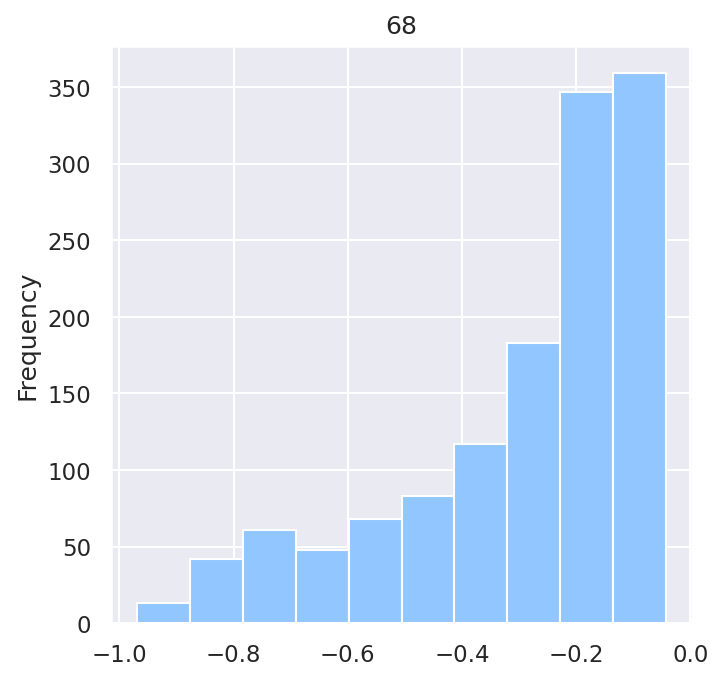

69
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



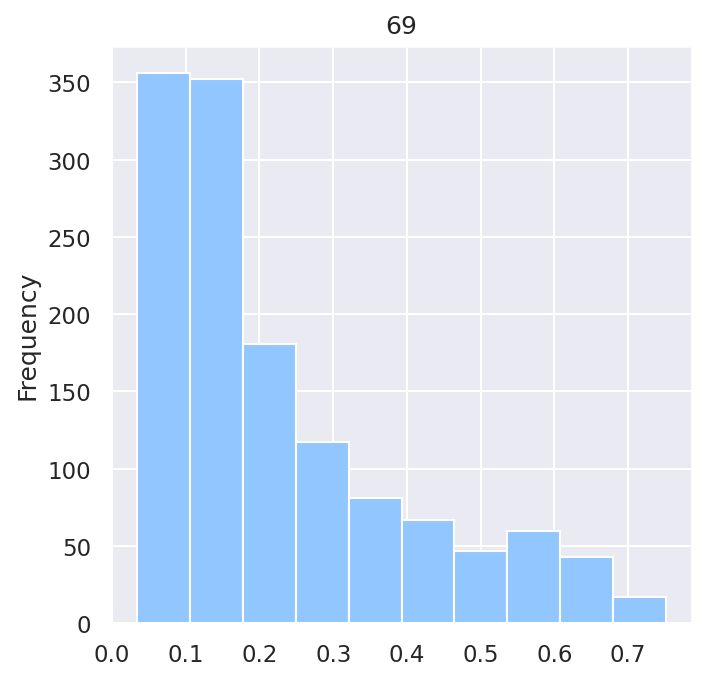

70
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



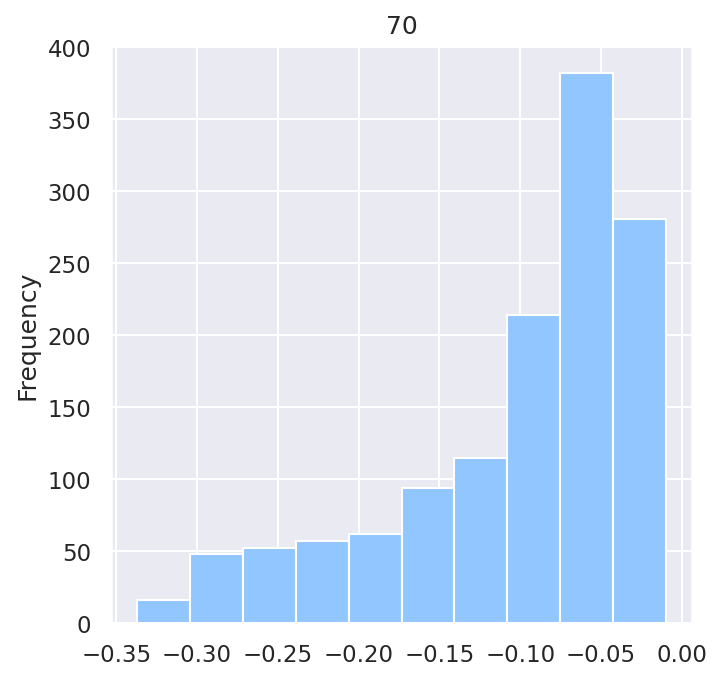

71
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



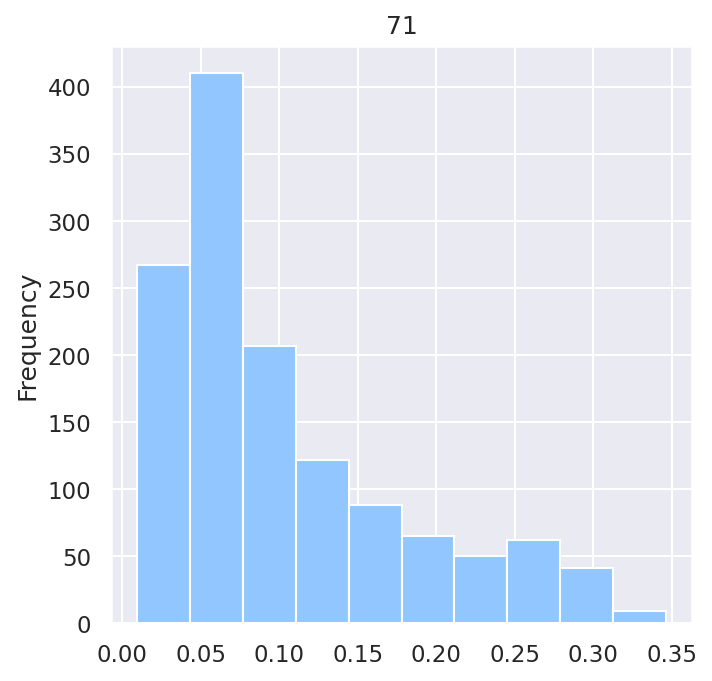

72
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



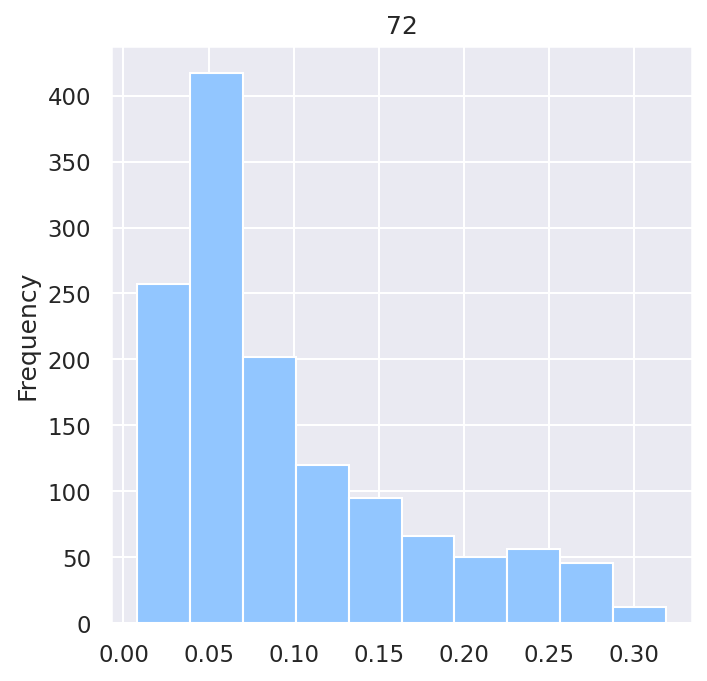

73
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



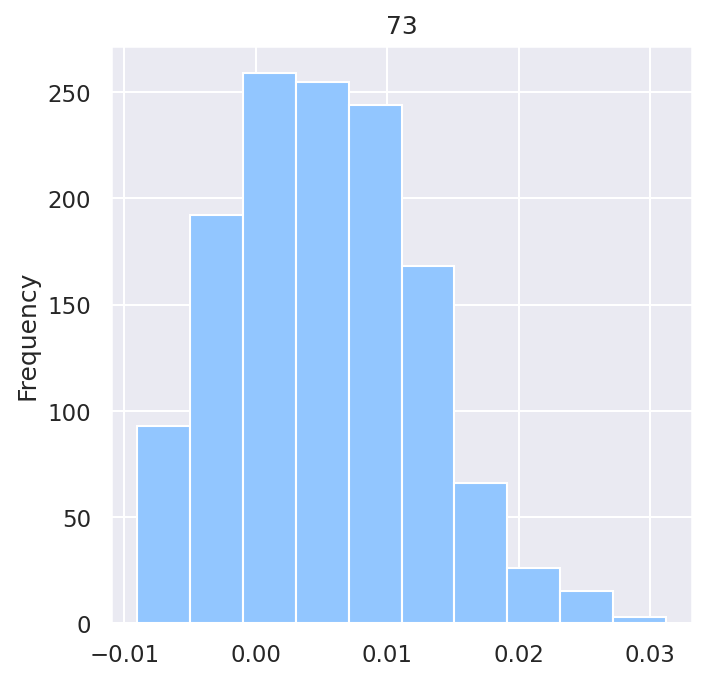

74
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



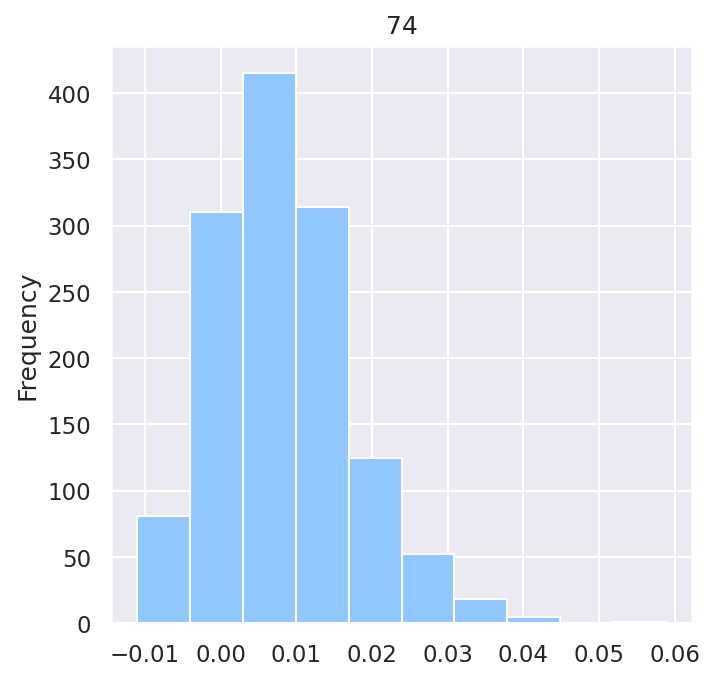

75
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



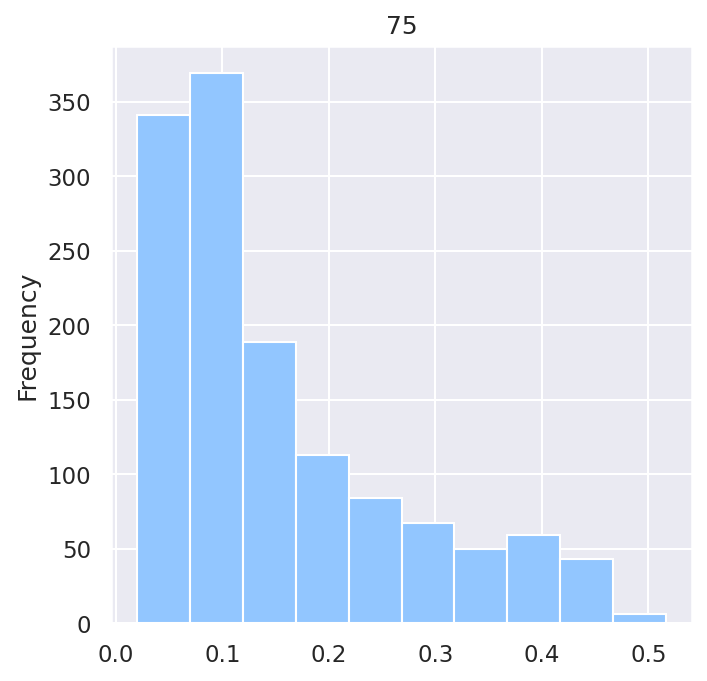

76
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



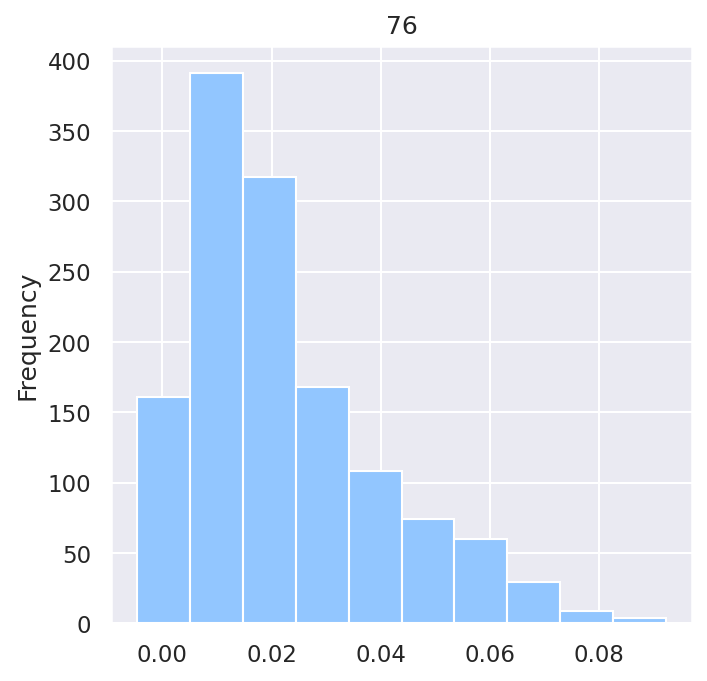

77
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



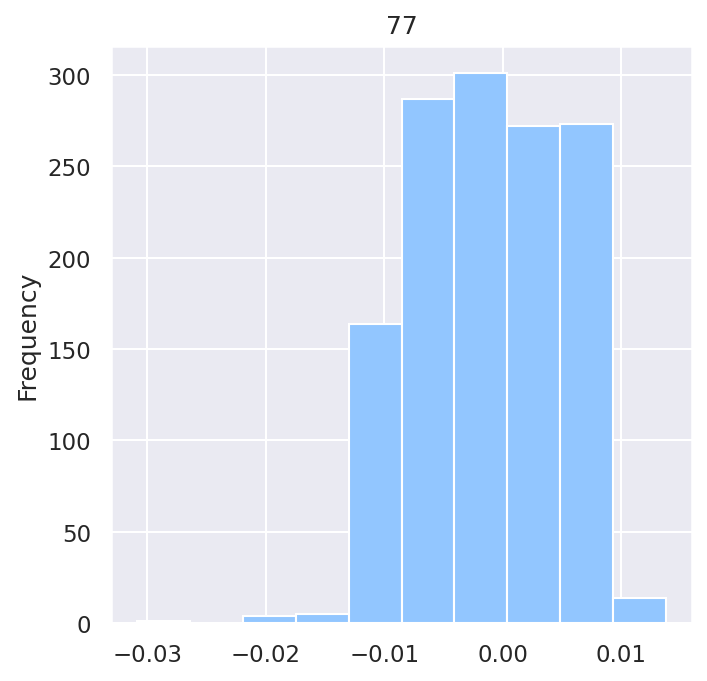

78
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



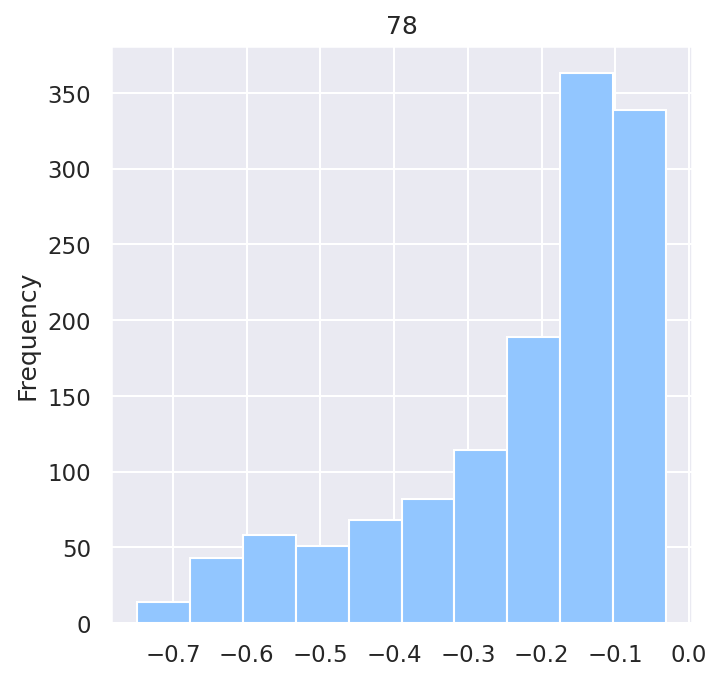

79
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



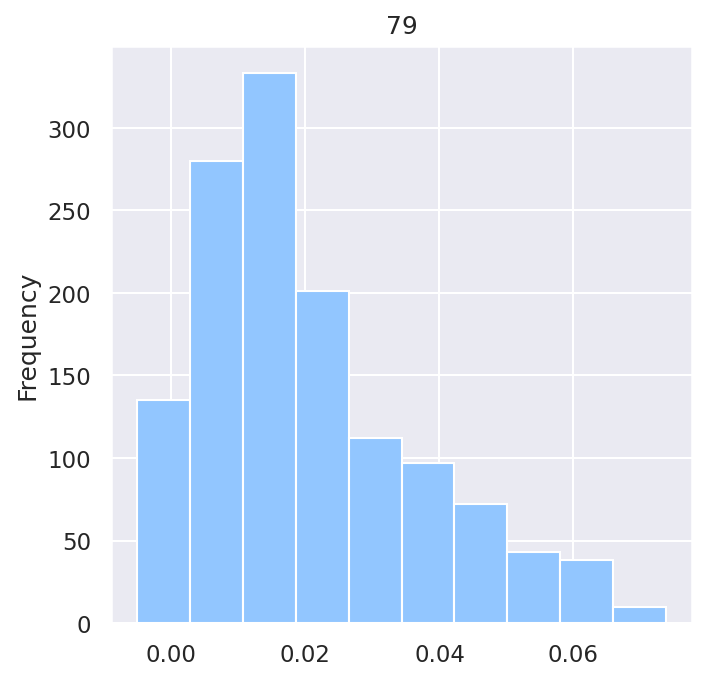

80
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



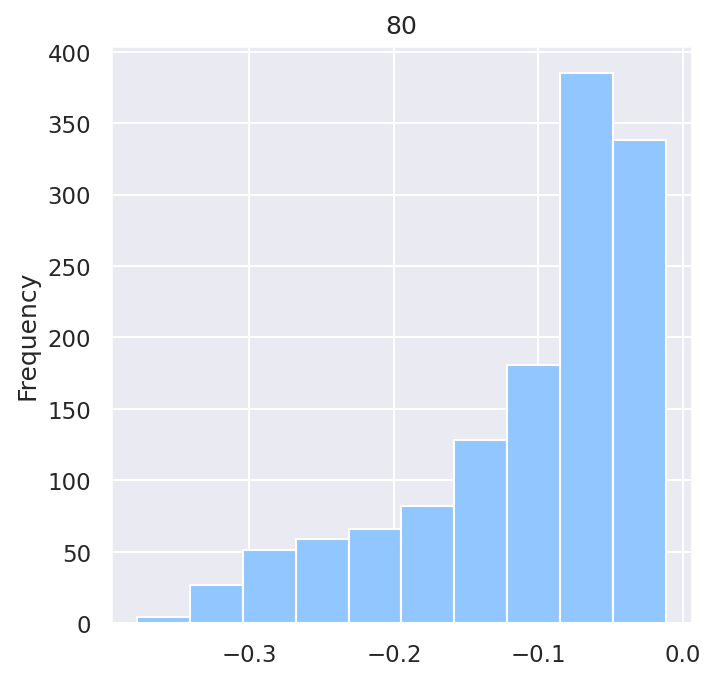

81
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



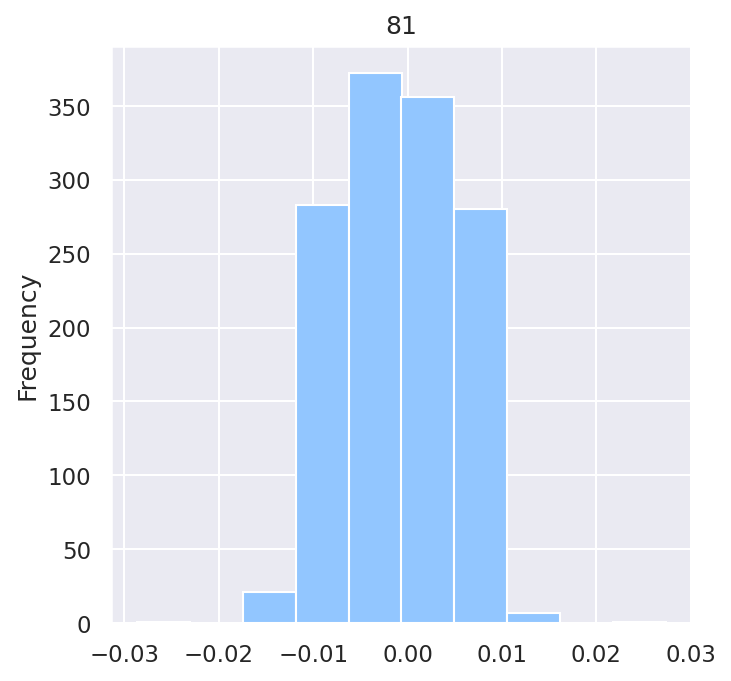

82
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



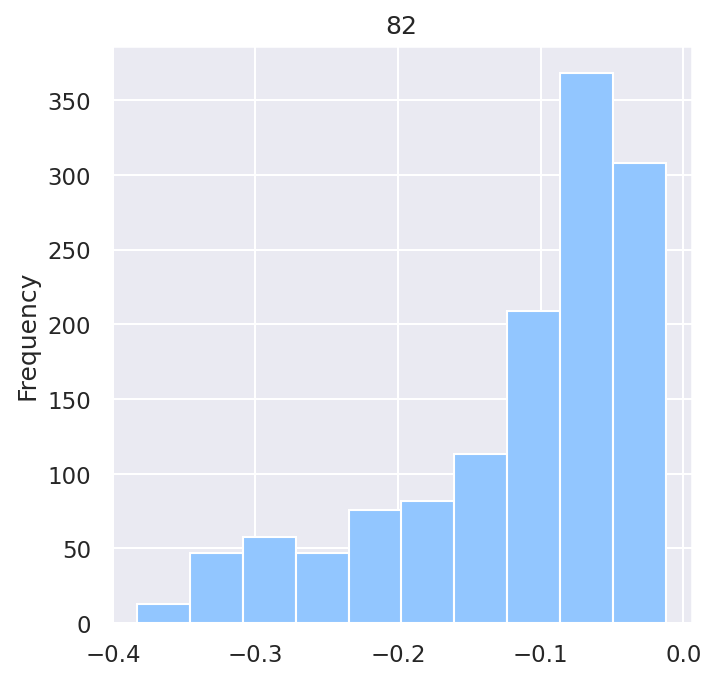

83
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



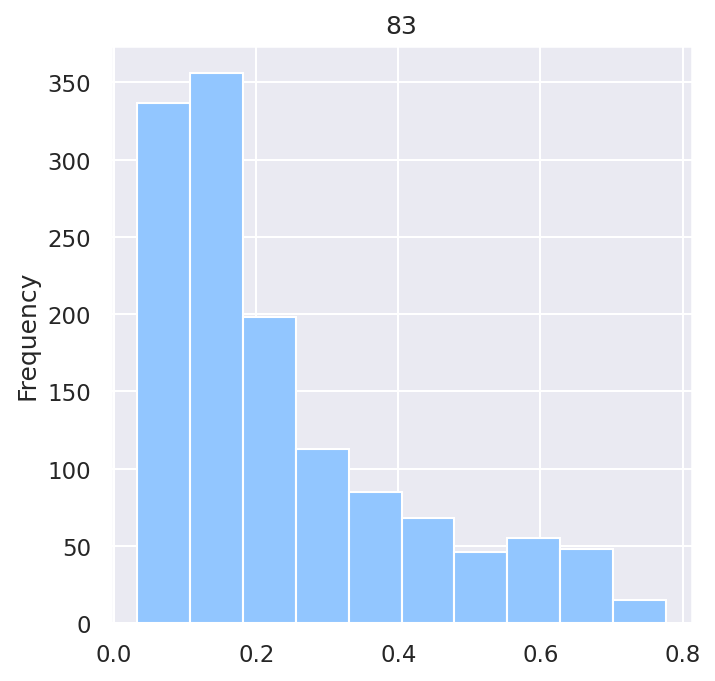

84
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



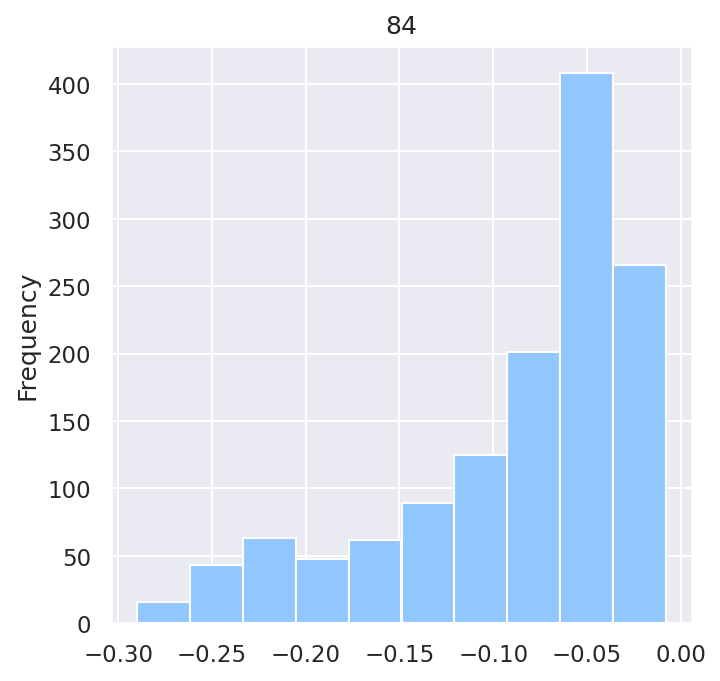

85
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



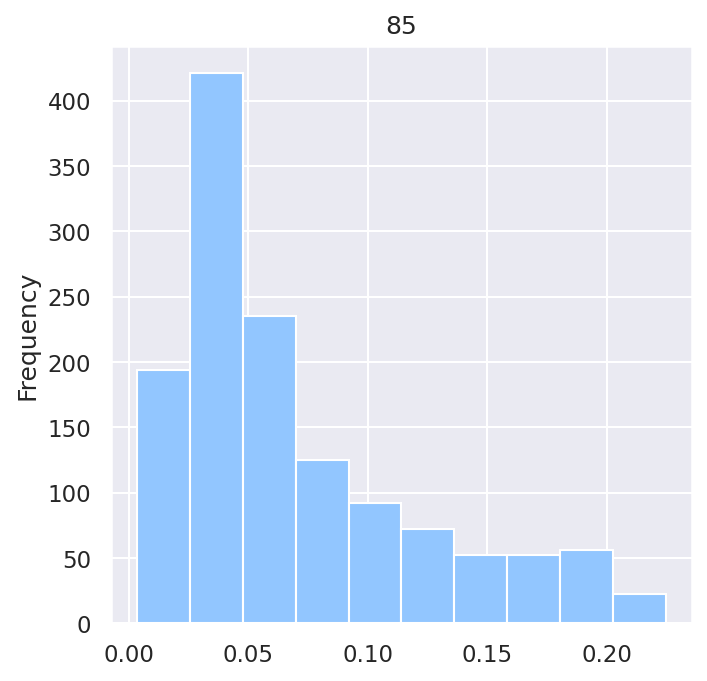

86
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



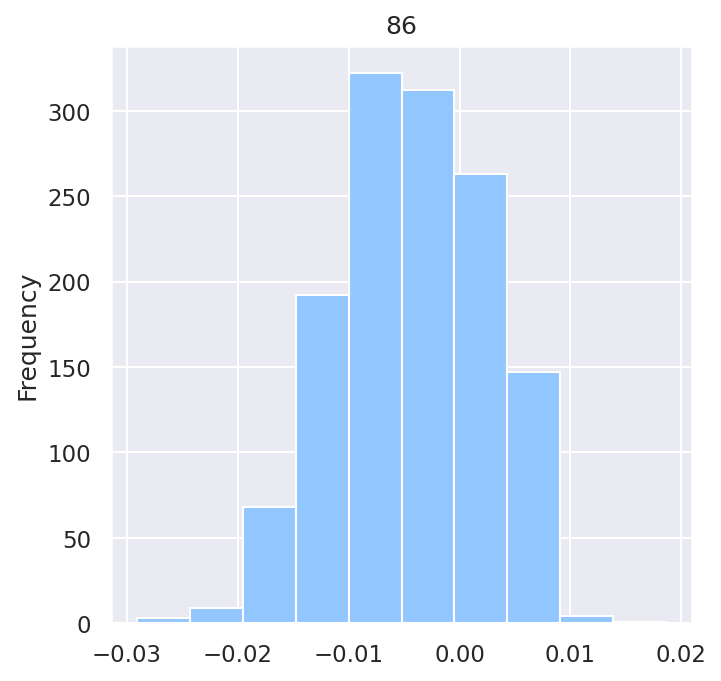

87
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



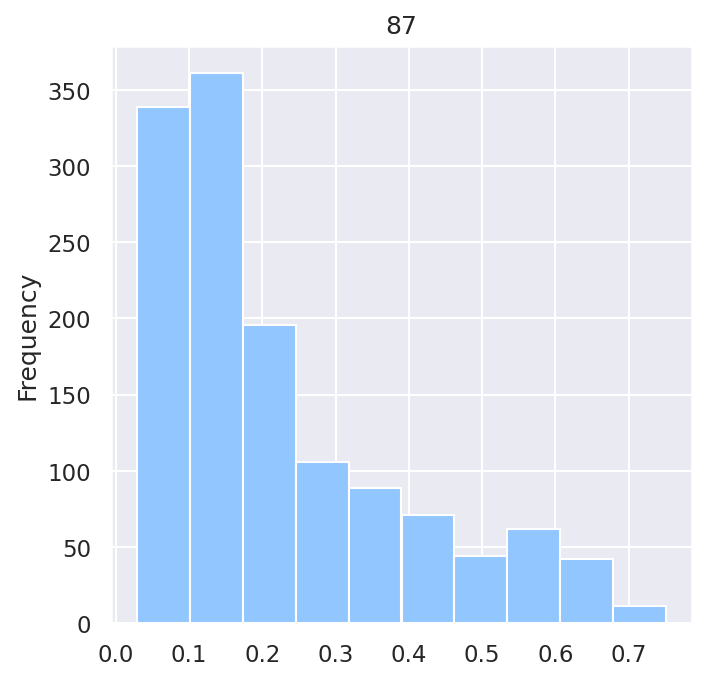

88
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



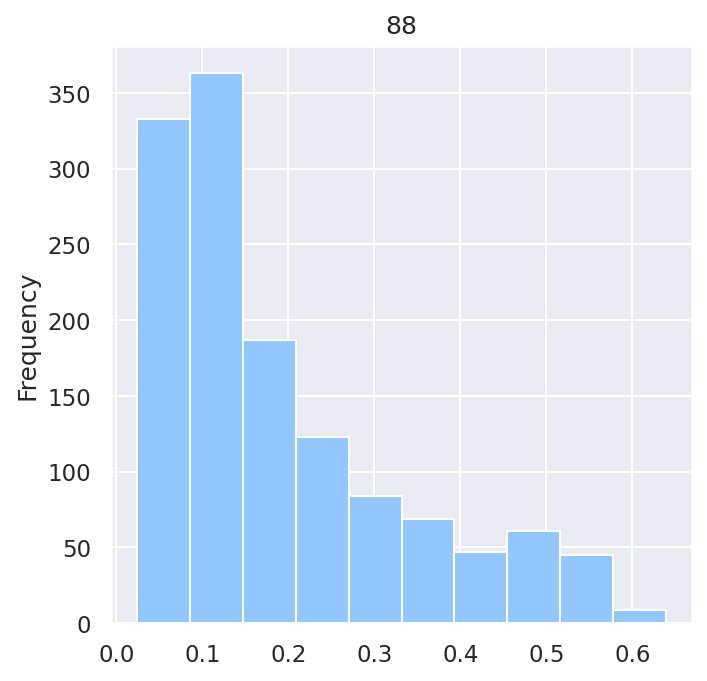

89
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



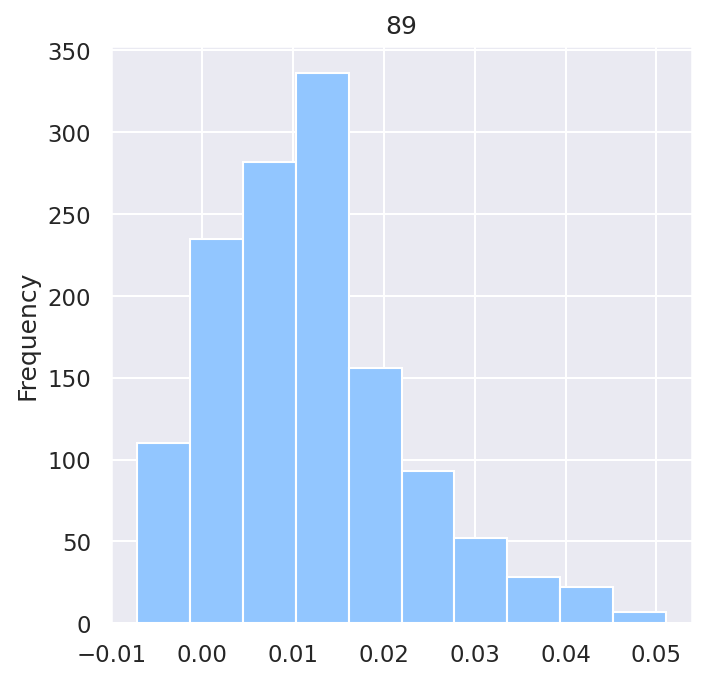

90
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



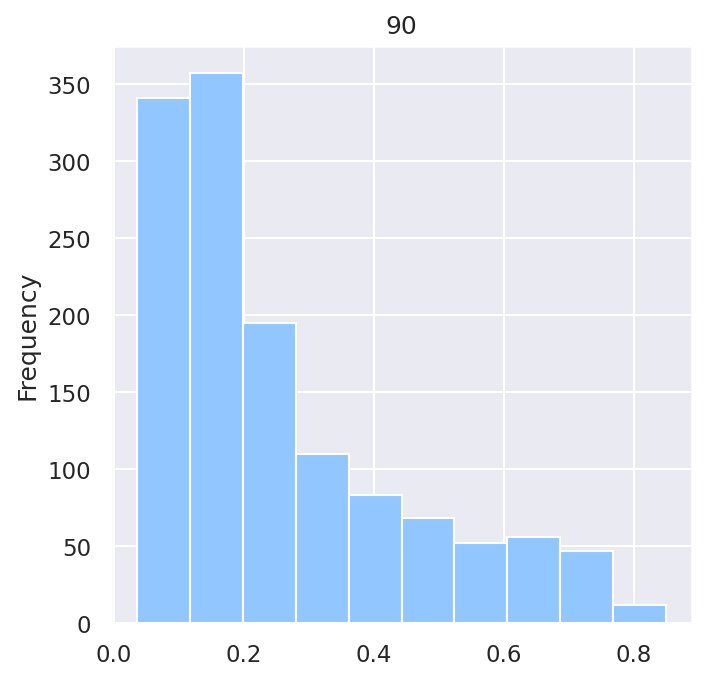

91
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



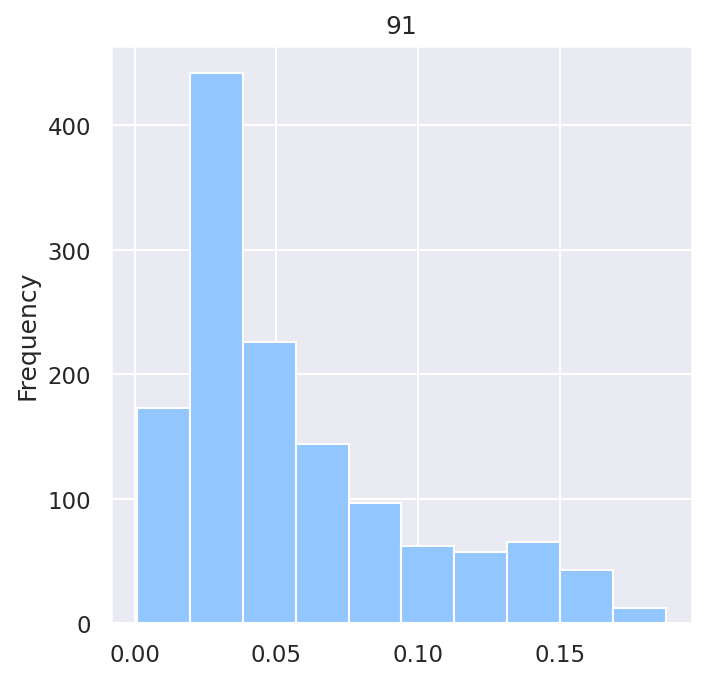

92
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



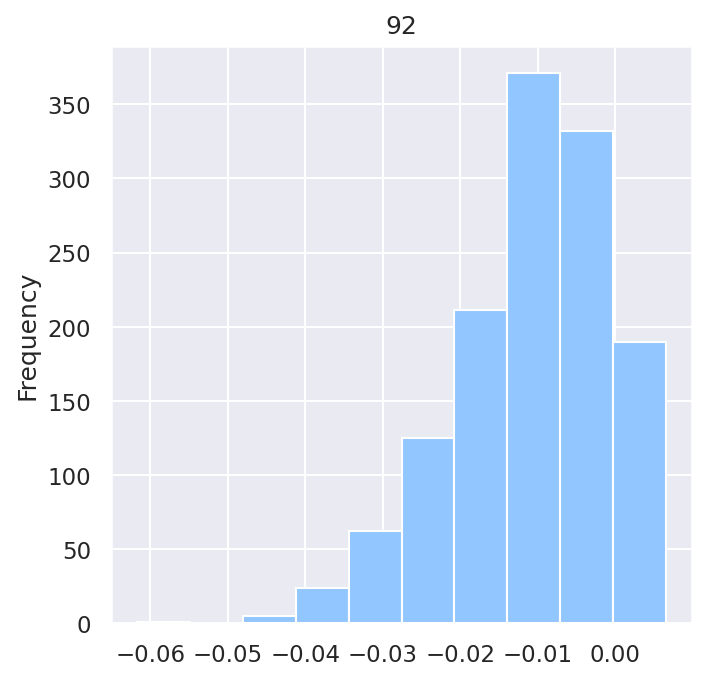

93
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



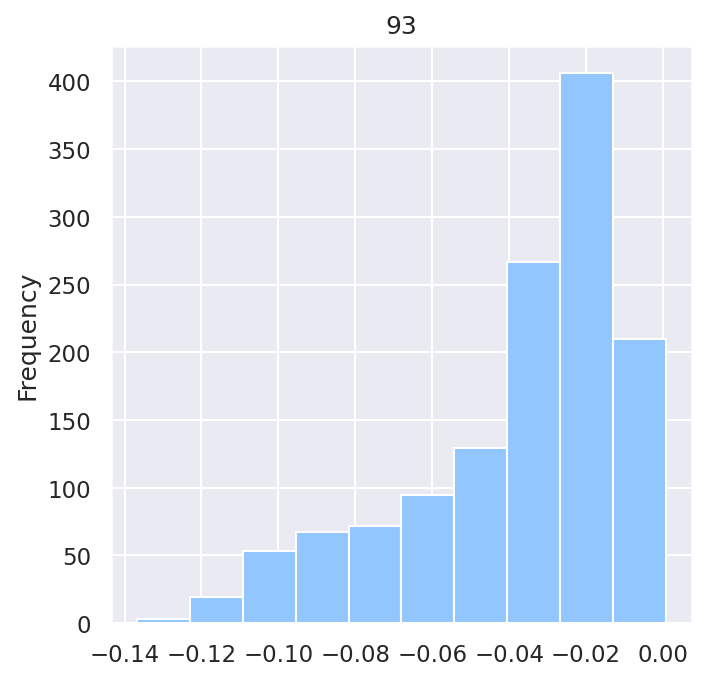

94
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



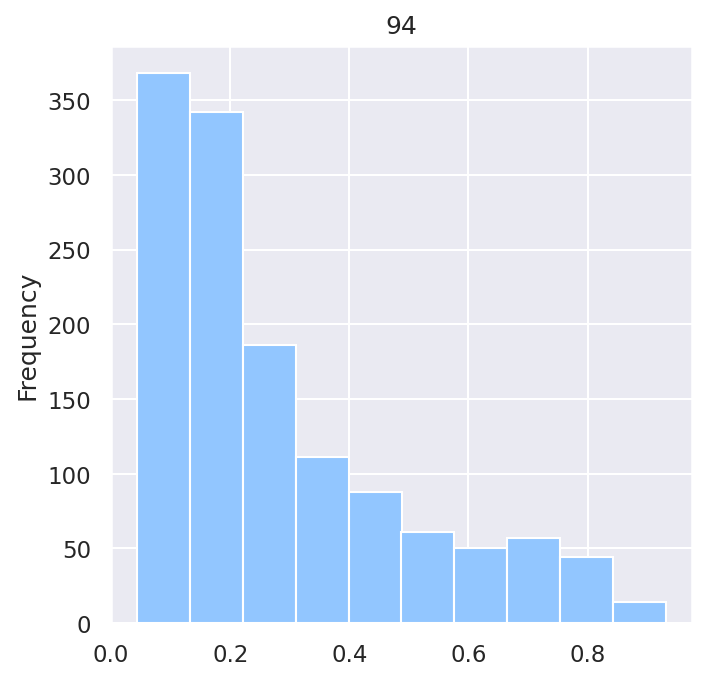

95
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



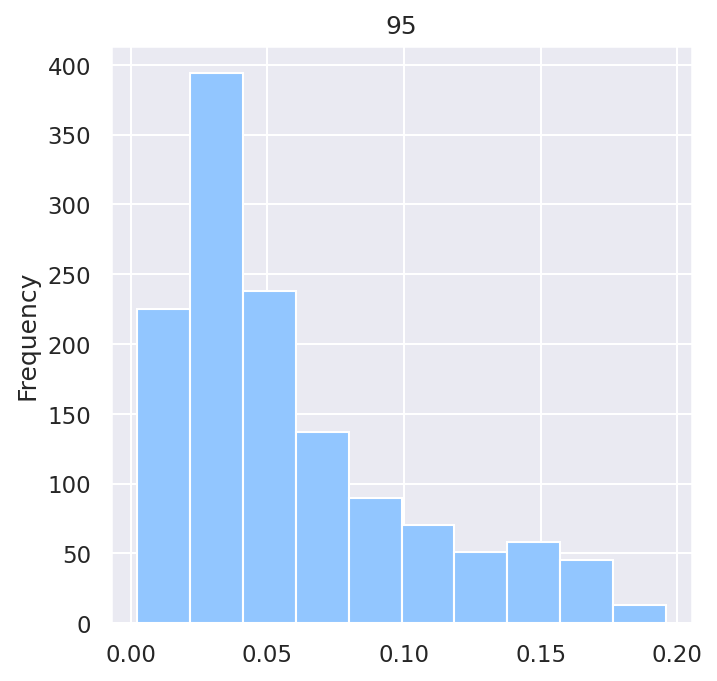

96
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



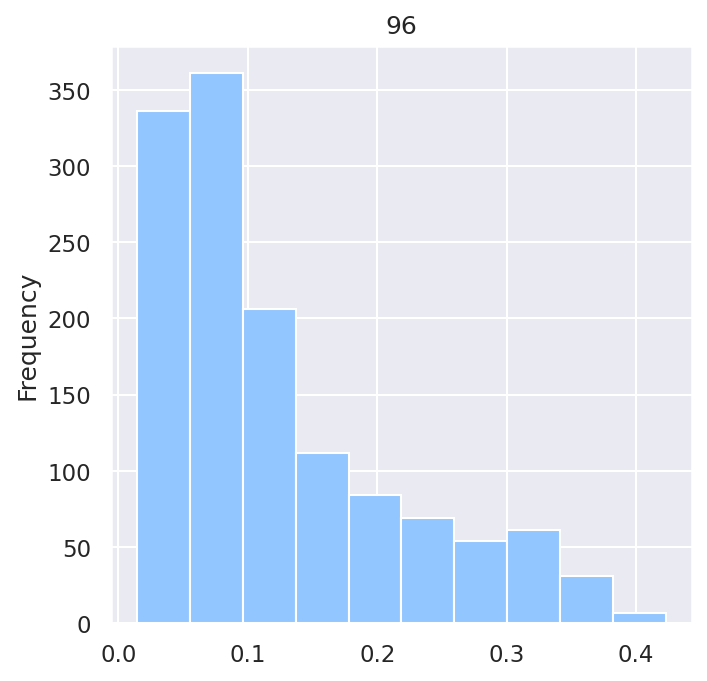

97
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



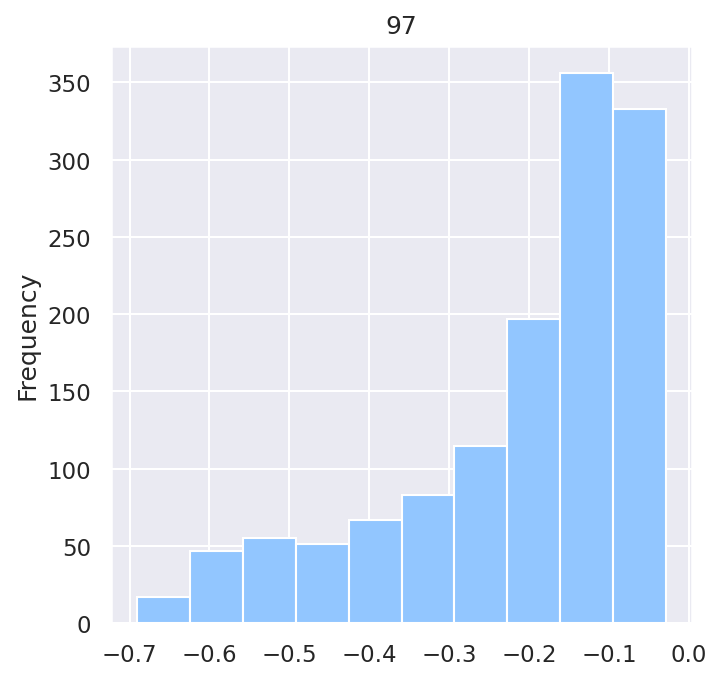

98
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



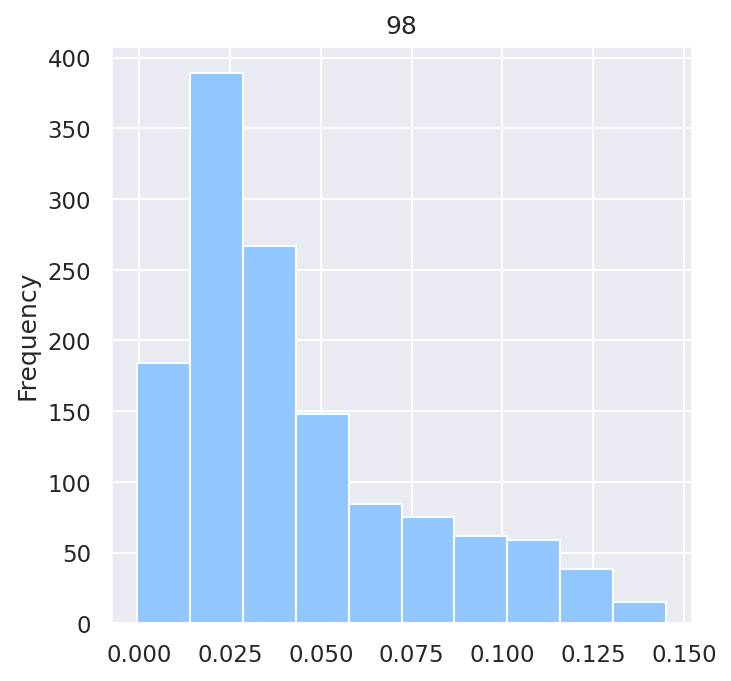

99
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



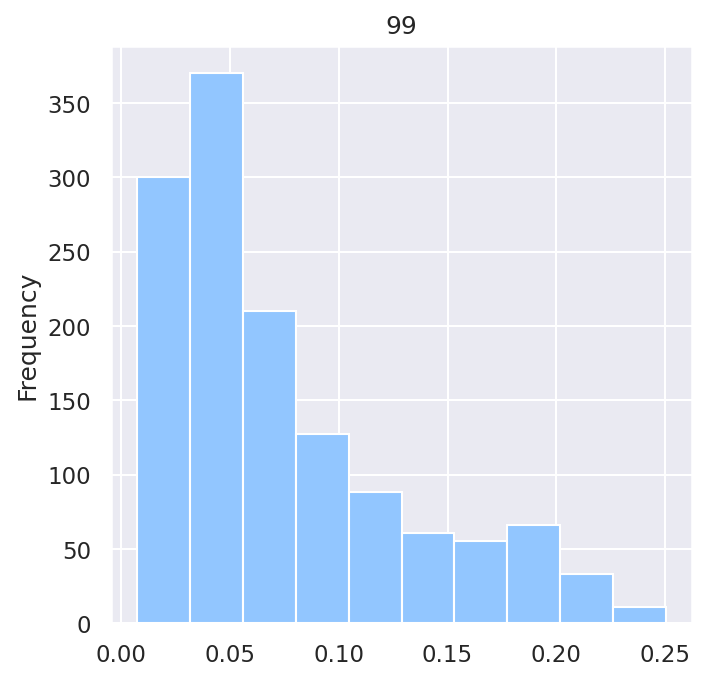

label
5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64



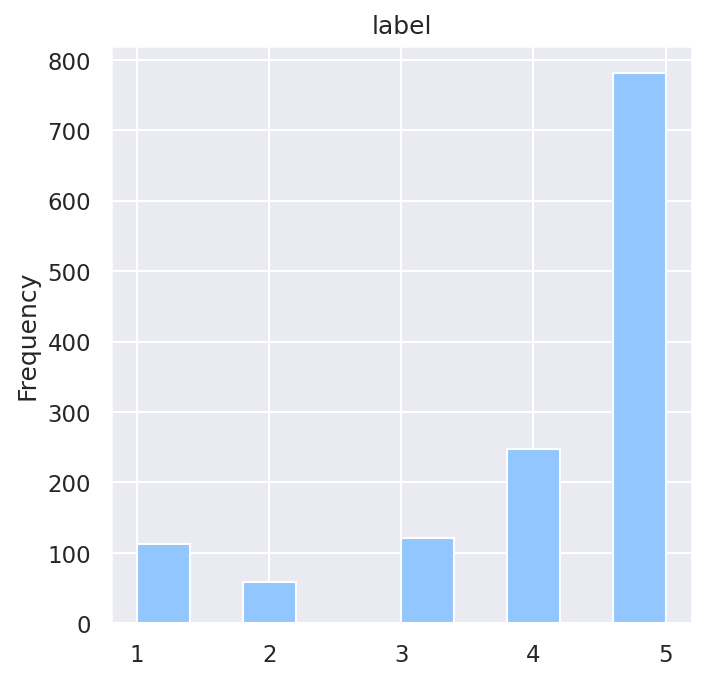

In [ ]:
for col in list(model_df.columns):
    print(col)
    print(model_df['label'].value_counts())
    print()

    model_df[col].plot(kind = 'hist', title = col)
    plt.show()

In [ ]:
# Processing
#Give reviews with Score>3 a positive rating, and reviews with a score<3 a negative rating.

def label_part(x):
    if x < 3:
        return 'negative'
    return 'positive'

actualScore = model_df['label']
#print(actualScore)
New_score = actualScore.map(label_part)
#print(New_score)
model_df['label']=New_score

# If score is equal to 3,it is considered as neutral score.

In [ ]:
#categorical_features = [model_df.columns[i] for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] if model_df[col].dtype == 'object']
#model_df = pd.get_dummies(model_df, columns = categorical_features)
##print('The data have ', model_df.shape[0], ' rows and ', model_df.shape[1], ' columns\n')
##print('column names: \n')
#print('\n'.join(list(model_df.columns)))

In [ ]:
class_counts = model_df['label'].value_counts()
class_counts

positive    1150
negative     171
Name: label, dtype: int64

In [ ]:
class_percentages = pd.Series([(x / model_df.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    87.055261
1    12.944739
dtype: float64

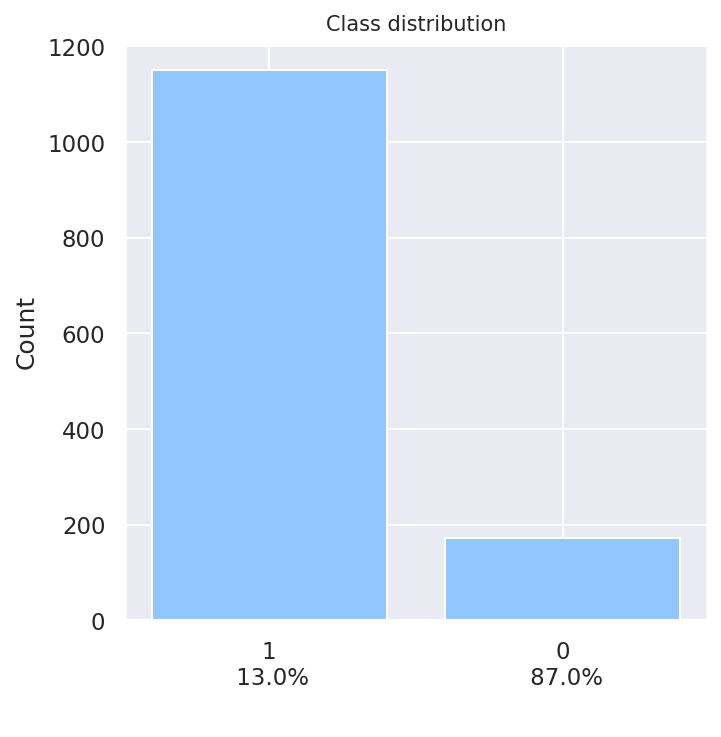

In [ ]:
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([1, 0])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(0).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel(' ')
ax.set_title('Class distribution',
              fontsize = 10)
plt.show()

LG one vs one

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(model_df[['1','10']],
                                                model_df['label'],
                                                train_size = 0.80,
                                                random_state = 42)

In [ ]:
classifier = LogisticRegression(solver = 'liblinear', max_iter = 1000, C = 1000)

In [ ]:
classifier.fit(Xtrain, ytrain)


LogisticRegression(C=1000, max_iter=1000, solver='liblinear')

In [ ]:
print(f'Accuracy on training data: {accuracy_score(classifier.predict(Xtrain), ytrain):.2f}')


Accuracy on training data: 0.88


In [ ]:
print(f'Accuracy on test data: {accuracy_score(classifier.predict(Xtest), ytest):.2f}')


Accuracy on test data: 0.85


In [ ]:
#plt.figure()
#ax = plt.gca()
#ax.set_ylabel('24')
#ax.set_xlabel('12')
#ax.set_title('',
#            fontsize = 10)
#_ = points_plot(ax, Xtrain, Xtest, ytrain, ytest, classifier, alpha = 0.2)

In [ ]:
print("Classification Report for Training Data")
print(classification_report(ytrain, classifier.predict(Xtrain)))

Classification Report for Training Data
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       132
    positive       0.88      1.00      0.93       924

    accuracy                           0.88      1056
   macro avg       0.44      0.50      0.47      1056
weighted avg       0.77      0.88      0.82      1056



In [ ]:
print("Classification Report for Test Data")
print(classification_report(ytest, classifier.predict(Xtest)))

Classification Report for Test Data
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        39
    positive       0.85      1.00      0.92       226

    accuracy                           0.85       265
   macro avg       0.43      0.50      0.46       265
weighted avg       0.73      0.85      0.79       265



LR ALL

Define X and y

In [ ]:
X = model_df.drop(columns = ['label'])
print("X: ", type(X), X.shape)

X:  <class 'pandas.core.frame.DataFrame'> (1321, 100)


In [ ]:
y = model_df['label']
print("y: ", type(y), y.shape)

y:  <class 'pandas.core.series.Series'> (1321,)


In [ ]:
list(X.columns)

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99']

Train/Test Split on X and y

In [ ]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, random_state = 2)
print('Training split has ', Xlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(ylr))+ ')')
print('Test split has ', Xtestlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(ytestlr)) + ')')

Training split has  990  rows
 and the corresponding labels have an equal number of values. (990)
Test split has  331  rows
 and the corresponding labels have an equal number of values. (331)


Class ratio between splits

In [ ]:
def plot_y_ratios(y, ytest):
    fig, ax = plt.subplots(2, sharex = True)
    ax[0].bar(x = [0, 1], height = [y[y == 0].count(),
                                    y[y == 1].count()])
    ax[0].set_ylabel('train', fontsize = 8)
    ax[0].set_ylim(0, 125)
    ax[1].bar(x = [0, 1], height = [ytest[ytest == 0].count(),
                                    ytest[ytest == 1].count()])
    ax[1].set_ylabel('test', fontsize = 8)
    ax[1].set_ylim(0, 125)
    ax[1].set_xticks([0, 1])
    ax[0].tick_params(which = 'both', labelsize = 8)
    ax[1].tick_params(which = 'both', labelsize = 8)
    ax[1].set_xlabel('heart disease\n(0 = no disease)', fontsize = 8)
    ax[0].set_title('% heart disease (where 1 means presence of heart diseases):\n' +
                    'train: ' + str(round(100 * (y[y ==1].count()/y.shape[0]), 0)) +
                    '\ntest: ' + str(round(100 * (ytest[ytest ==1].count()/ytest.shape[0]), 0)),
                   fontsize = 10)
    plt.show()

In [ ]:
#plot_y_ratios(ylr, ytestlr)

In [ ]:
#Xlrstrat, Xtestlrstrat, ylrstrat, ytestlrstrat = train_test_split(X, y,
#                                                                  random_state = 2,
 #                                                                 stratify = y)
#plot_y_ratios(ylrstrat, ytestlrstrat)

In [ ]:
clf = LogisticRegression(solver = 'newton-cg', max_iter = 1000)

In [ ]:
clf.fit(Xlrstrat, ylrstrat)


LogisticRegression(max_iter=1000, solver='newton-cg')

In [ ]:
y_predict_test = clf.predict(Xtestlrstrat)
y_predict_training = clf.predict(Xlrstrat)

In [ ]:
print("[Test] Accuracy score (y_predict_test, ytestlrstrat):",
      f'{accuracy_score(y_predict_test, ytestlrstrat):.2f}')

[Test] Accuracy score (y_predict_test, ytestlrstrat): 0.87


In [ ]:
print("[Test] Accuracy score: (ytestlrstrat, y_predict_test) [**note reversed order]",
      f'{accuracy_score(ytestlrstrat, y_predict_test):.2f}')

[Test] Accuracy score: (ytestlrstrat, y_predict_test) [**note reversed order] 0.87


In [ ]:
print("[Training] Accuracy score: (ylrstrat, y_predict_training)",
      f'{accuracy_score(ylrstrat, y_predict_training):.2f}')

[Training] Accuracy score: (ylrstrat, y_predict_training) 0.87


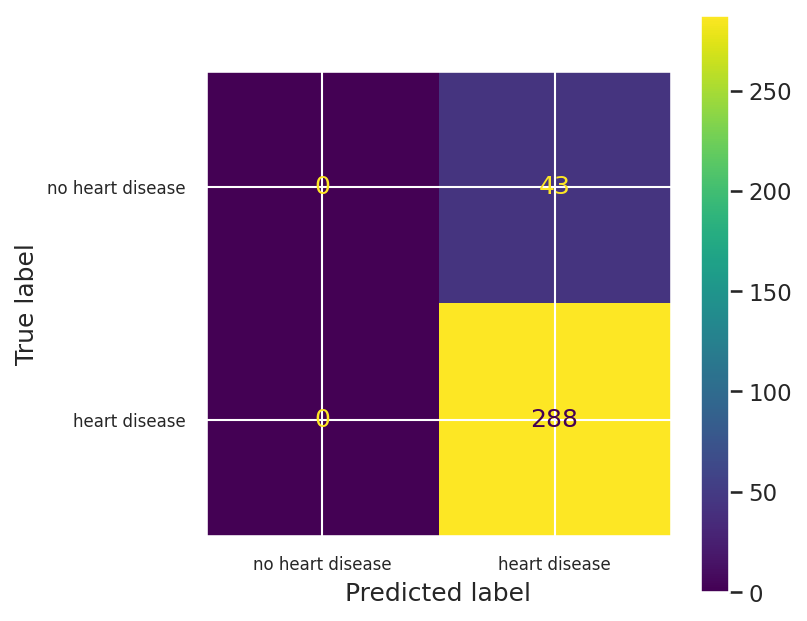

In [ ]:
cm = confusion_matrix(ytestlrstrat, y_predict_test, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm,
                                    display_labels = ['no heart disease', 'heart disease'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
ax.set_yticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
display_cm.plot(ax = ax)

In [ ]:
print(classification_report(ylrstrat, y_predict_training))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       128
    positive       0.87      1.00      0.93       862

    accuracy                           0.87       990
   macro avg       0.44      0.50      0.47       990
weighted avg       0.76      0.87      0.81       990



In [ ]:
print(classification_report(ytestlrstrat, y_predict_test))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        43
    positive       0.87      1.00      0.93       288

    accuracy                           0.87       331
   macro avg       0.44      0.50      0.47       331
weighted avg       0.76      0.87      0.81       331



In [ ]:
#
# here we try multiple splits and see the effects, with the same proportion 75% train and 25% test
#
# keep lists for training accuracy,
#                test accuracy,
#                and the difference between the latter and the former
#
training_accuracy = []
test_accuracy = []
accuracy_difference = []
#
# define number of trials
#
n_splits = 25
#
# define LogisticRegression object
#
clf = LogisticRegression(solver = 'newton-cg', max_iter = 1000)
#
# loop over multiple trials
#
for i in range(0, n_splits):
#
# perform a split for this iteration,
# using different random_state for every iteration
# this ensures each split is likely to be unique
#
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, stratify = y, random_state = i)
#
# fit the Classifier on the training set
#
    clf.fit(Xlr, ylr)
#
# predict the labels for the training data
#
    y_predict_training = clf.predict(Xlr)
#
# predict the labels for the test data
#
    y_predict_test = clf.predict(Xtestlr)
#
# save training set accuracy for this split
#
    tr_accuracy = accuracy_score(y_predict_training, ylr)
    training_accuracy.append(tr_accuracy)
#
# save test set accuracy for this split
#
    tst_accuracy = accuracy_score(y_predict_test, ytestlr)
    test_accuracy.append(tst_accuracy)
#
# save difference between the two acuracy values
#
    accuracy_difference.append(tst_accuracy - tr_accuracy)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(range(len(training_accuracy)),
           training_accuracy,
           color = 'blue',
           alpha = 0.5,
           label = 'Train data results')
ax.plot(range(len(training_accuracy)),
        training_accuracy,
        color = 'blue',
        linestyle = '-.',
        linewidth = 0.5)
ax.scatter(range(len(test_accuracy)),
           test_accuracy,
           color = 'red',
           alpha = 0.35,
           label = 'Test data results')
ax.plot(range(len(test_accuracy)),
        test_accuracy,
        color = 'red',
        linestyle = '-.',
        linewidth = 0.5)
ax.legend(fontsize = 8, loc = "lower right")
ax.set_ylabel('Training vs Test Accuracy')
ax.set_ylim(0, 1)
ax.set_xlabel('trial number')
plt.show()

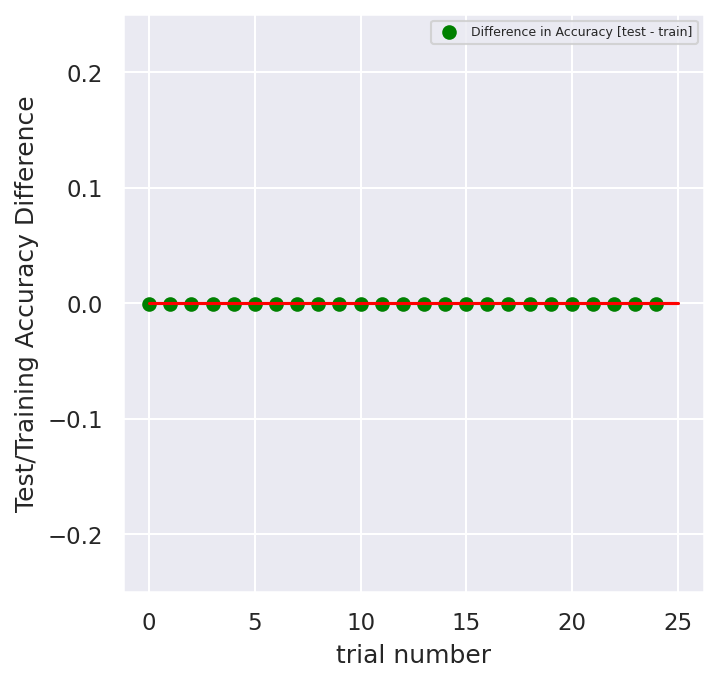

In [ ]:
fig, ax = plt.subplots()
ax.scatter(range(len(accuracy_difference)),
           accuracy_difference,
           color = 'green',
           label = 'Difference in Accuracy [test - train]')
ax.plot([0, len(accuracy_difference)], [0, 0], 'red')
ax.legend(fontsize = 6)
ax.set_ylabel('Test/Training Accuracy Difference')
ax.set_ylim(-0.25, 0.25)
ax.set_xlabel('trial number')
plt.show()

In [ ]:
print("[Training Classification Report]")
print(classification_report(ylr, y_predict_training))
#
print("[Test Classification Report]")
print(classification_report(ytestlr, y_predict_test))

[Training Classification Report]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       128
    positive       0.87      1.00      0.93       862

    accuracy                           0.87       990
   macro avg       0.44      0.50      0.47       990
weighted avg       0.76      0.87      0.81       990

[Test Classification Report]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        43
    positive       0.87      1.00      0.93       288

    accuracy                           0.87       331
   macro avg       0.44      0.50      0.47       331
weighted avg       0.76      0.87      0.81       331



Tuning the Model

In [ ]:
def cv_score(clf, x, y, score_func = accuracy_score):
    result = 0
    nfold = 5
    x.reset_index(drop = True, inplace = True)
    y.index = x.index
    for train, test in KFold(nfold, shuffle = True,
                             random_state = 42).split(x):
        clf.fit(x.loc[train, :], y[train])
        result += score_func(clf.predict(x.loc[test, :]), y[test])
    return result / nfold

In [ ]:
clf = LogisticRegression(solver = 'liblinear', max_iter = 500)
score = cv_score(clf, Xlr, ylr)
print(f'{score:.2f}')

0.87


LGBM

XGBOOST